# Modélisation classique (données mensuelles)

In [1]:
# Chargement de packages
library(tidyverse)
library(lubridate)
library(readr)
library(ggplot2)
library(readxl)
library(forecast)
library(gridExtra)
library(dplyr)
library(tseries)
library("stats")
library("tidyr")
library("ggplot2")

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Warning message:
"le package 'forecast' a été compilé avec la version R 4.3.2"
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attachement du package : 'gridExtra'


L'objet suivant est masqué depuis 'package:dplyr':

    combine




In [4]:
resultat_mensuel = read.csv("mensuelle.csv")

In [5]:
serie_mensuelle <- ts(resultat_mensuel$nombre_employes_total, start= c(2014,06), end = c(2023,12), frequency=12)

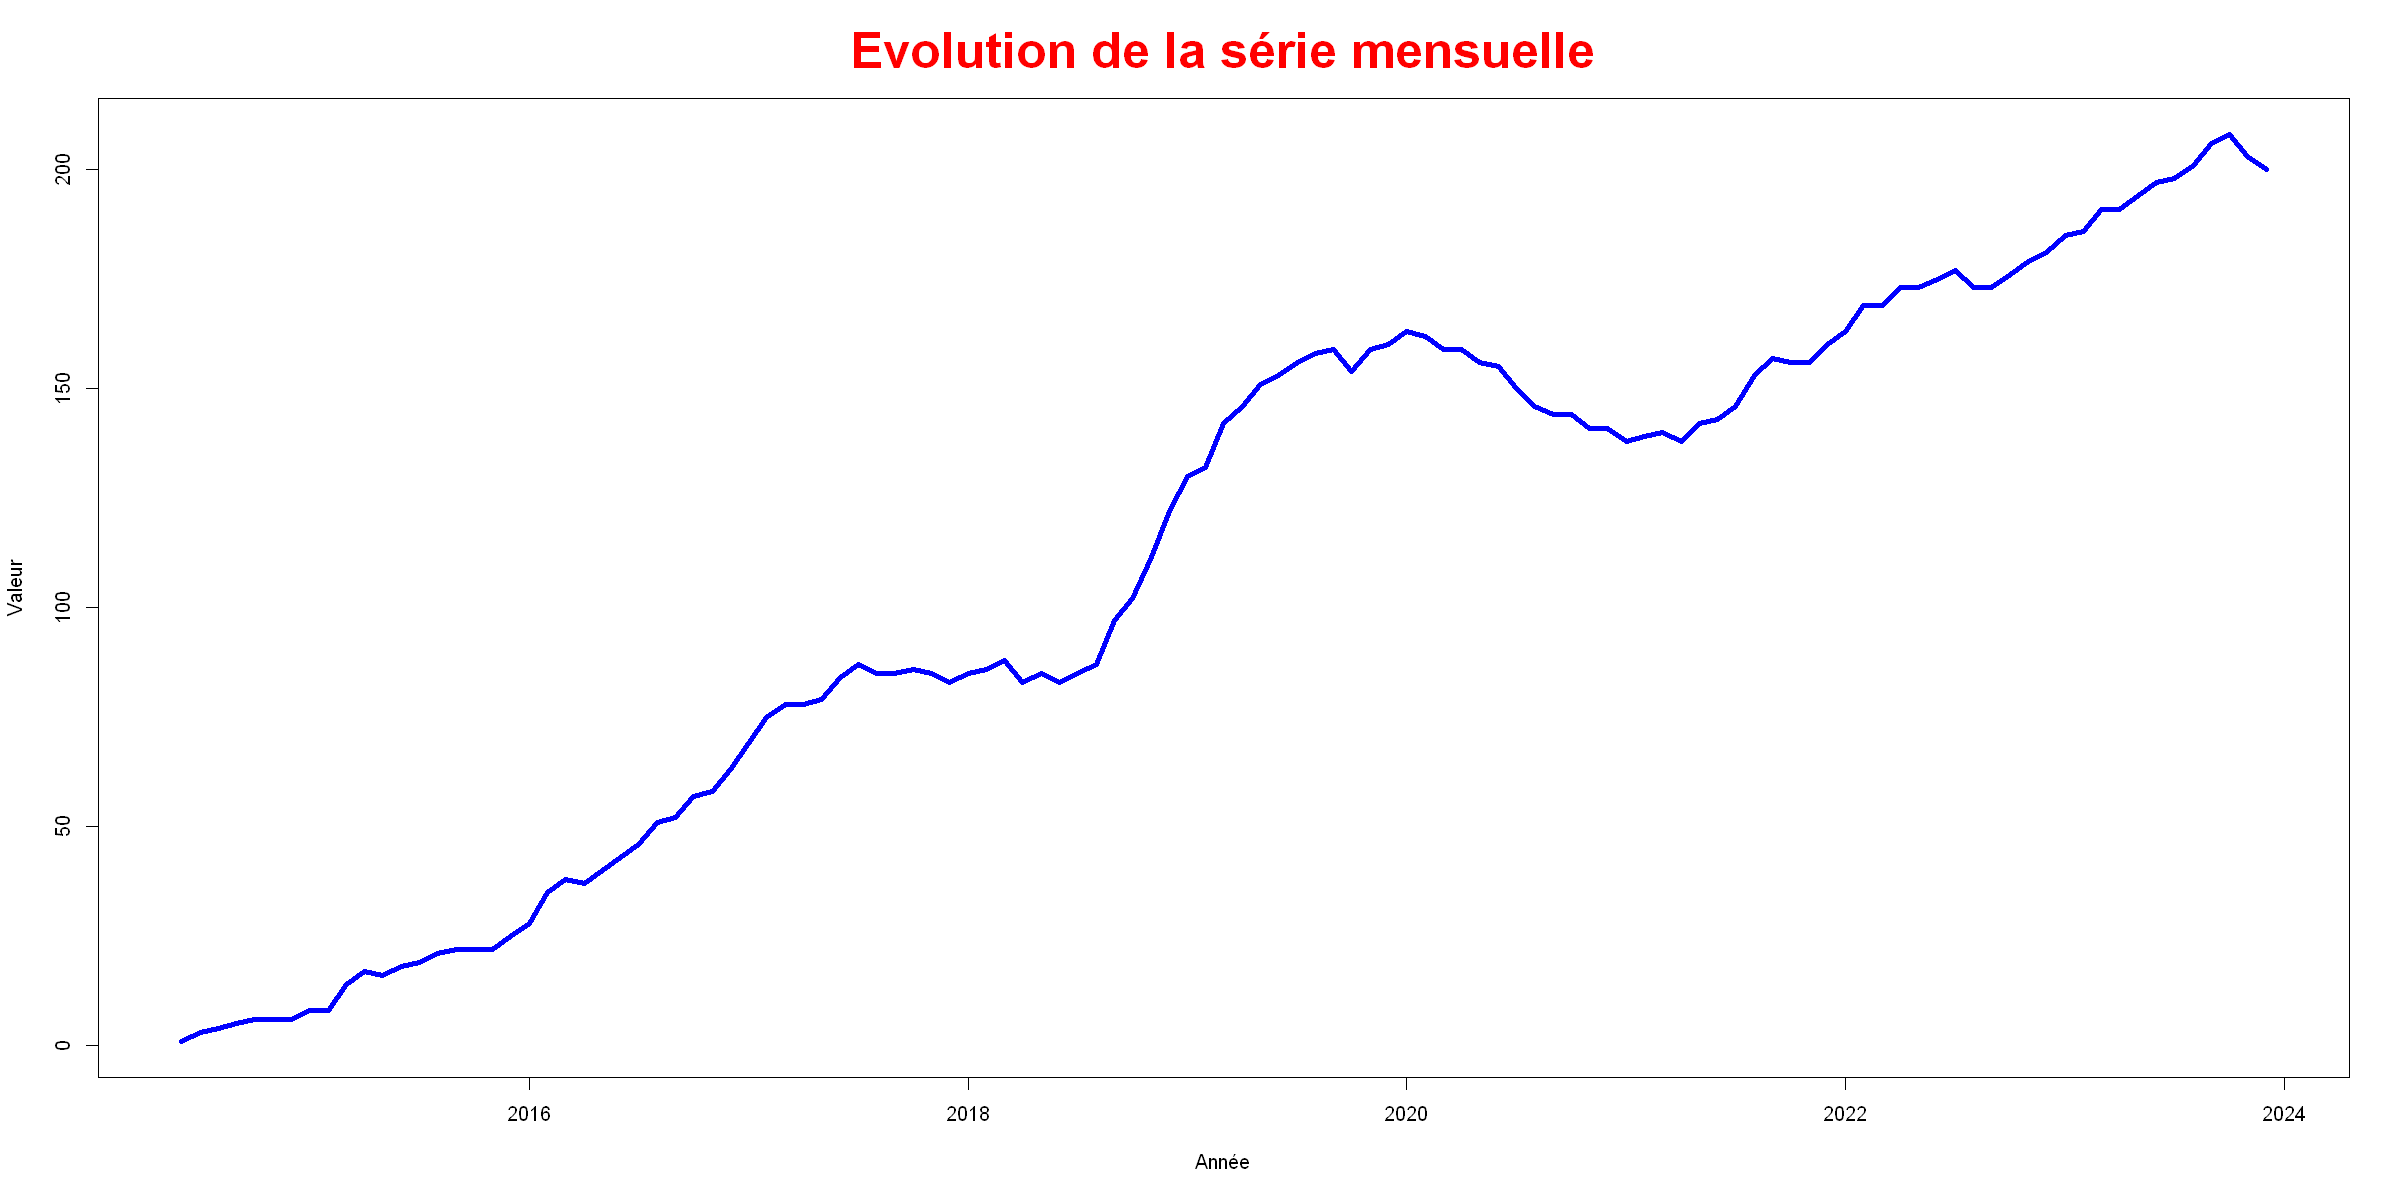

In [7]:
# Spécification de la taille du graphique
options(repr.plot.width=20, repr.plot.height=10)

# Série temporelle avec des propriétés personnalisées
plot.ts(serie_mensuelle,
        main = "Evolution de la série mensuelle",
        col = "blue",  
        lty = 1,  
        lwd = 4,
        xlab = "Année",  
        ylab = "Valeur", 
        cex.axis = 0.8,  
        cex.lab = 1.2,   
        col.axis = "black", 
        col.lab = "black",  
        font.axis = 4,  
        font.lab = 4,   
        cex.main = 2.5, 
        col.main = "red"
)

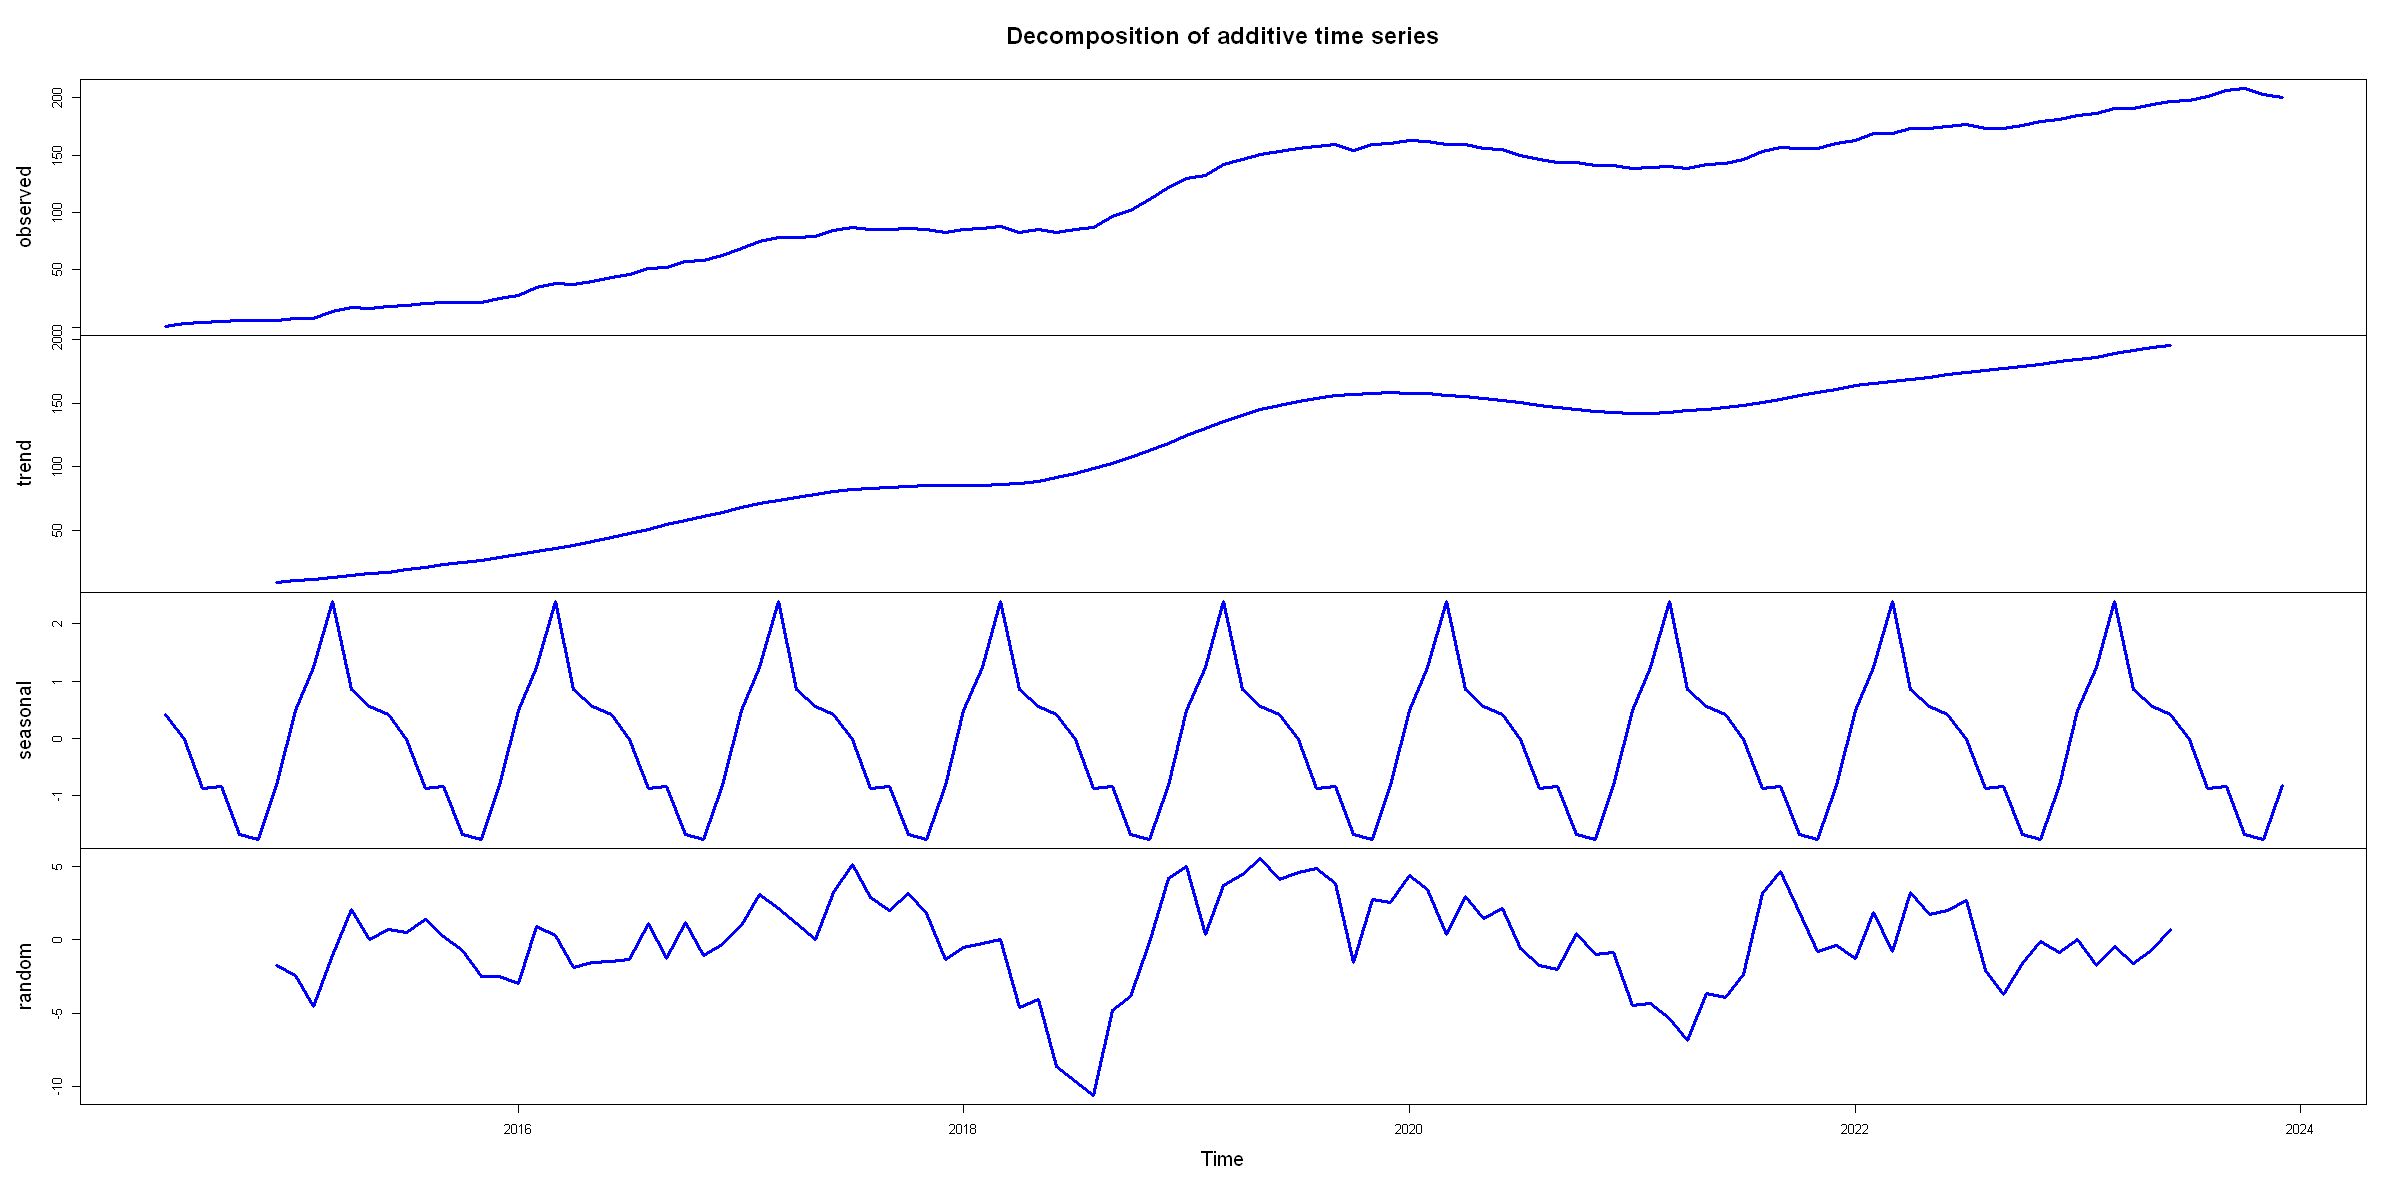

In [8]:
# Décomposition de la série temporelle
decomp <- decompose(serie_mensuelle#,type="multiplicative"
                   )

# Tracer les composantes de la décomposition avec des couleurs personnalisées
plot(decomp, col = "blue", lwd="3")

## Test de stationnarité

Pour effectuer une modélisation univariée sur la série mensuelle du nombre d'employés de Consortia, on peut procéder d’abord par un test de la stationnarité de la série. La stationnarité est une propriété importante pour les séries temporelles car elle influence le choix des modèles appropriés. Il existe plusieurs tests pour évaluer la stationnarité d’une série temporelle. Voici deux tests couramment utilisés : le test de ***Dickey-Fuller (simple et augmenté) (ADF)*** et le test de ***Kwiatkowski-Phillips-Schmidt-Shin (KPSS)***.

- **Test de Dickey-Fuller simple et augmenté (ADF)** : Le test de Dickey-Fuller augmenté est largement utilisé pour tester la stationnarité d’une série temporelle. L’hypothèse nulle (H0) du test est que la série temporelle présente une racine unitaire, ce qui signifie qu’elle est non stationnaire. Si la p-value du test est inférieure à un certain seuil (par exemple, 0,05), on peut rejeter l’hypothèse nulle et conclure que la série est stationnaire.
- **Test de Kwiatkowski-Phillips-Schmidt-Shin (KPSS)** : Le test KPSS est un autre test utilisé pour évaluer la stationnarité d’une série temporelle. Contrairement au test ADF, le test KPSS a une hypothèse nulle (H0) selon laquelle la série est stationnaire. Si la p-value du test est supérieure à un certain seuil (par exemple, 0,05), on ne peut pas rejeter l’hypothèse nulle et on peut conclure que la série est stationnaire.
- **Test de Phillips-Perron** : Le test de Phillips-Perron est basé sur une régression augmentée avec des retards d’ordre supérieur pour capturer la dépendance sérielle. L’hypothèse nulle (H0) du test est que la série possède une racine unitaire , ce qui signifie qu’elle est non stationnaire. Si la p-value du test est inférieure à un certain seuil (par exemple, 0,05), on peut rejeter l’hypothèse nulle et conclure que la série est stationnaire.

In [9]:
adf_test_simple <- adf.test(serie_mensuelle,k=0) ## Test de Dickey-Fuller simple
adf_test_simple


	Augmented Dickey-Fuller Test

data:  serie_mensuelle
Dickey-Fuller = -0.92052, Lag order = 0, p-value = 0.9471
alternative hypothesis: stationary


Le résultat indique que le test Dickey-Fuller simple est de -0.92052 avec un lag order de 0, et le p-value est de 0.9471. Puisque le p-value est supérieur au seuil de signification communément choisi (0.05), on ne rejette pas l'hypothèse nulle selon laquelle la série n'est pas stationnaire.

In [10]:
adf_test_augmente <- adf.test(serie_mensuelle,k=1) ## Test de Dickey-Fuller augmenté
adf_test_augmente


	Augmented Dickey-Fuller Test

data:  serie_mensuelle
Dickey-Fuller = -1.4648, Lag order = 1, p-value = 0.7988
alternative hypothesis: stationary


Le test Dickey-Fuller augmenté (*qui est une version améliorée du test simple qui prend en compte l'autocorrélation dans les résidus*) donne un résultat de -1.4648 avec un lag order de 1, et un p-value de 0.7988. Comme pour le test simple, le p-value élevé indique que l'hypothèse nulle de non-stationnarité ne peut pas être rejetée.

In [11]:
pp_test <- pp.test(serie_mensuelle) ## Test de Phillips-Perron
kpss_test <- kpss.test(serie_mensuelle) ## Test de Kwiatkowski-Phillips-Schmidt-Shin (KPSS)
kpss_test
pp_test

Warning message in kpss.test(serie_mensuelle):
"p-value smaller than printed p-value"



	KPSS Test for Level Stationarity

data:  serie_mensuelle
KPSS Level = 2.2742, Truncation lag parameter = 4, p-value = 0.01



	Phillips-Perron Unit Root Test

data:  serie_mensuelle
Dickey-Fuller Z(alpha) = -5.2724, Truncation lag parameter = 4, p-value
= 0.8113
alternative hypothesis: stationary


Le test PP donne un Dickey-Fuller Z de -5.2724 et un p-value de 0.8113, ce qui confirme également la non-rejection de l'hypothèse nulle de non-stationnarité.
Contrairement aux tests ADF et PP, le test KPSS évalue l'hypothèse nulle de stationnarité. Le KPSS Level est de 2.2742 avec un p-value de 0.01. Avec un p-value inférieur à 0.05, l'hypothèse nulle de stationnarité est rejetée, indiquant que la série n'est pas stationnaire au niveau.

**En résumé, les tests suggèrent tous que la série temporelle serie_mensuelle n'est pas stationnaire. Cela signifie qu'elle peut avoir une tendance ou une saisonnalité significative, ce qui pourrait nécessiter des ajustements avant d'appliquer certains modèles de prévision ou d'analyse.**

### ACF et pACF de la série mensuelle

L'**ACF (Autocorrelation Function)** et la **PACF (Partial Autocorrelation Function)** sont deux outils essentiels en analyse de séries temporelles. Elles permettent de comprendre les dépendances temporelles dans une série de données.

**ACF (Autocorrelation Function)**

L'ACF mesure la corrélation entre une séquence et elle-même à différentes périodes de temps. Autrement dit, elle permet d'évaluer la similitude entre les observations en fonction du décalage de temps entre elles.

**PACF (Partial Autocorrelation Function)**

La PACF est une corrélation qui exclut l'effet des termes intermédiaires. C'est-à-dire qu'elle est une mesure de la corrélation entre des observations à un certain intervalle, en tenant compte des valeurs à des intervalles plus courts.

**Utilisations**

Les graphiques ACF et PACF sont couramment utilisés pour aider à choisir les paramètres d'un modèle ARIMA en analyse de séries temporelles. Par exemple, le graphique ACF peut être utilisé pour identifier le terme MA (moyenne mobile) du modèle, tandis que le graphique PACF peut aider à identifier le terme AR (auto-régressif).

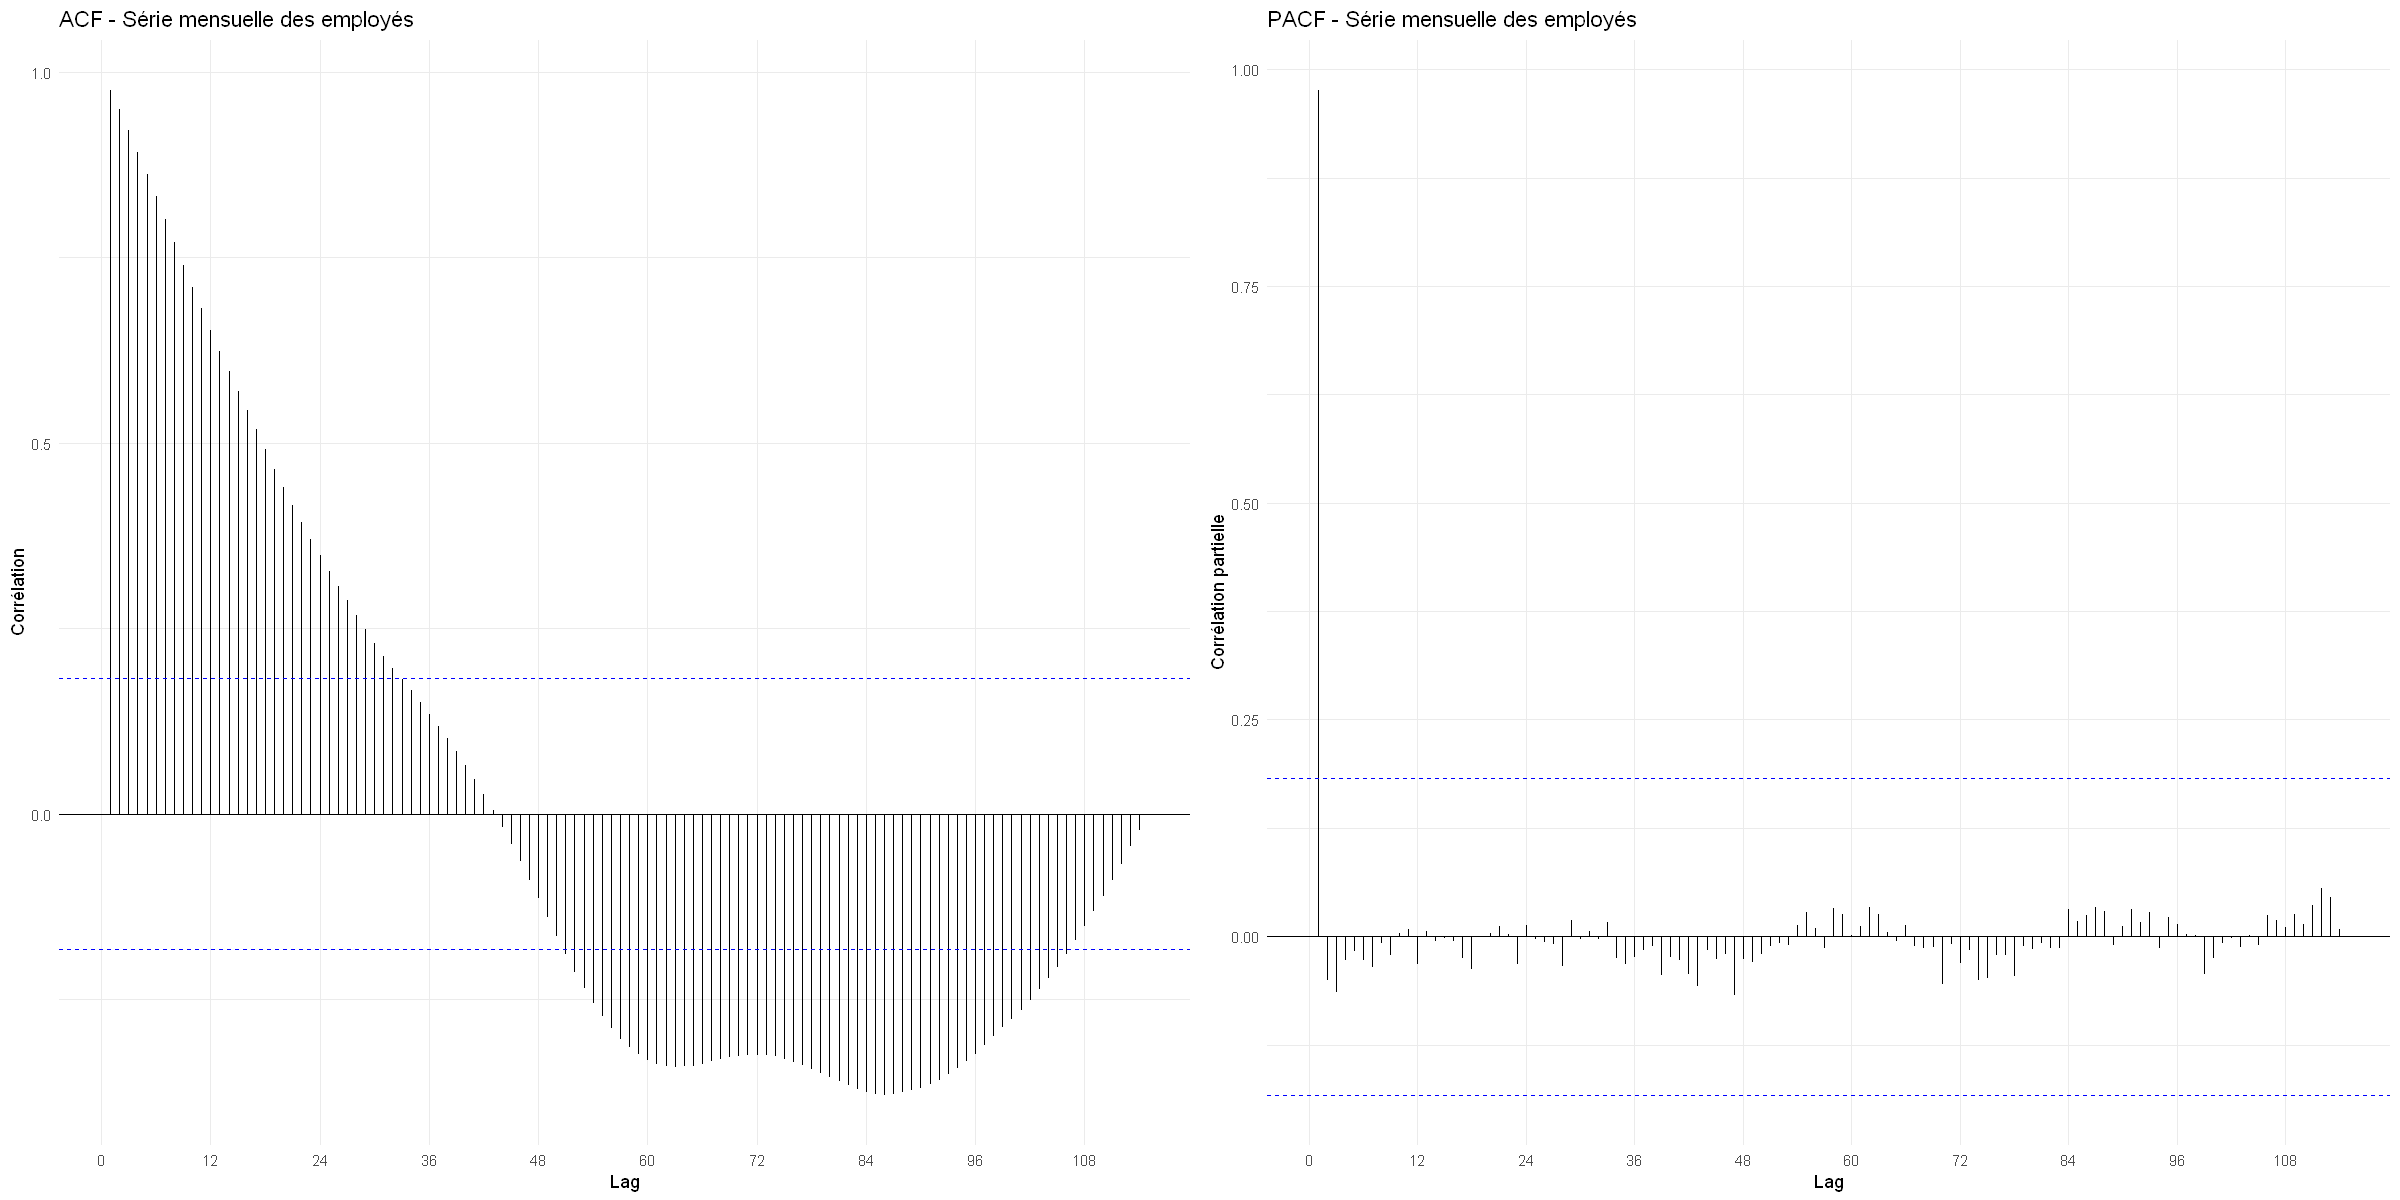

In [12]:
# Tracer l'ACF
acf_plot <- ggAcf(serie_mensuelle, lag.max = 150) +
  labs(title = "ACF - Série mensuelle des employés",
       x = "Lag",
       y = "Corrélation") +
  theme_minimal()

# Tracer le PACF
pacf_plot <- ggPacf(serie_mensuelle, lag.max = 150) +
  labs(title = "PACF - Série mensuelle des employés",
       x = "Lag",
       y = "Corrélation partielle") +
  theme_minimal()

# Afficher les graphiques
grid.arrange(acf_plot, pacf_plot, ncol=2)

Selon l’acf, la série ne semble pas être stationnaire (pas de décroissance exponentielle de l’acf vers zéro). En effet, on peut constater un comportement vaguement sinusoïdal de l’acf avec une période pas bien définie.

### Différentiation d'ordre 1

In [13]:
serie.df = diff(serie_mensuelle,lag=1,differences=1)

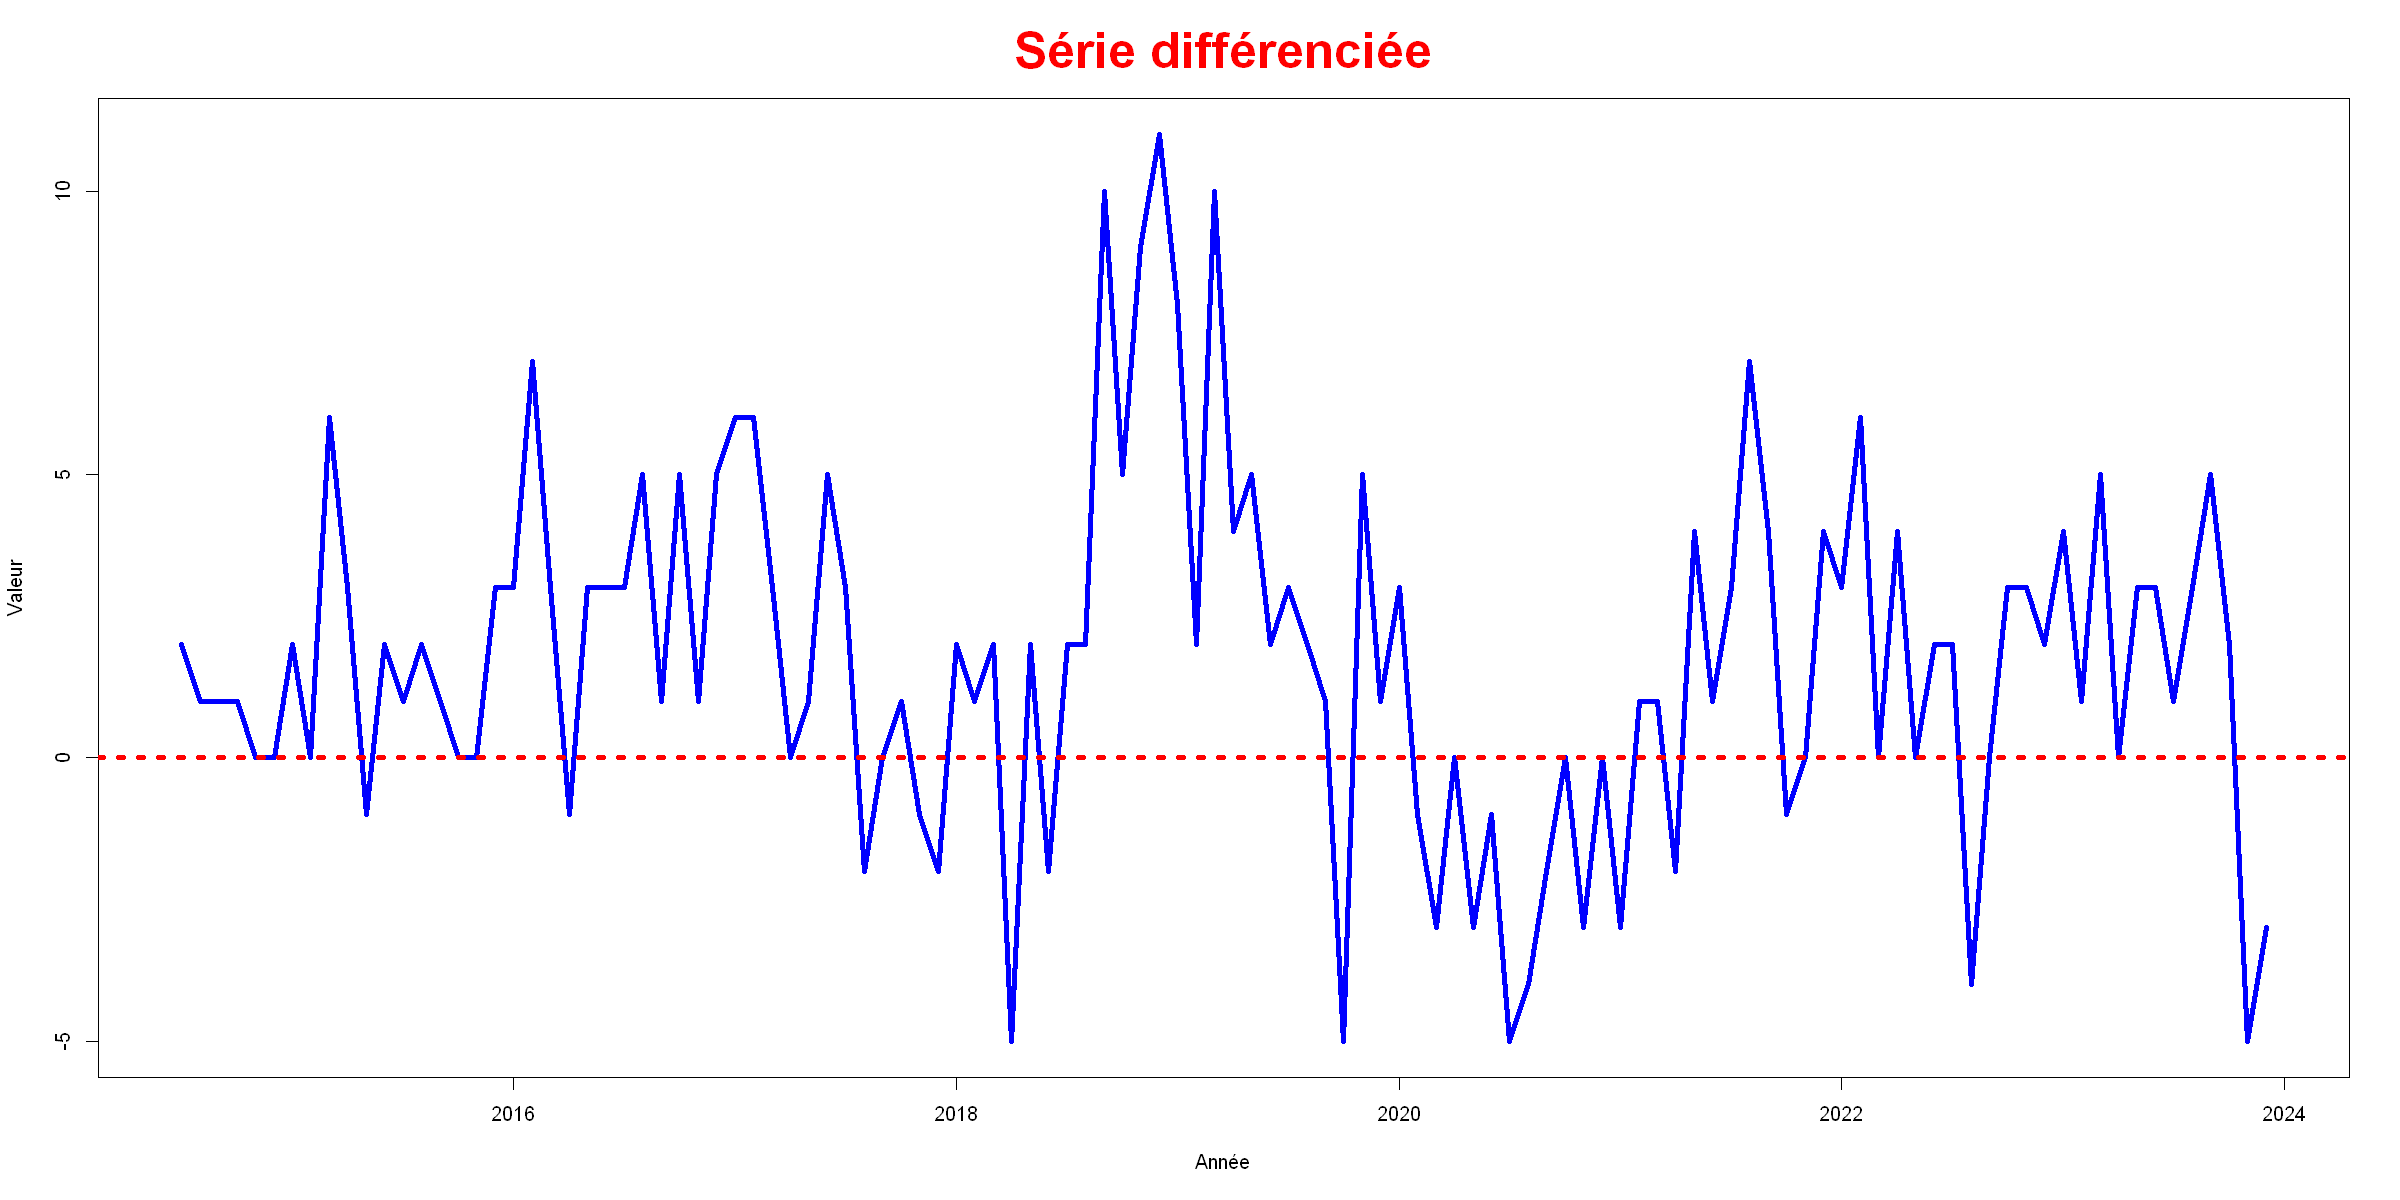

In [14]:
# Série temporelle avec des propriétés personnalisées
plot.ts(serie.df,
        main = "Série différenciée",
        col = "blue",
        lty = 1,
        lwd = 4,
        xlab = "Année",
        ylab = "Valeur",
        cex.axis = 0.8,
        cex.lab = 1.2,
        col.axis = "black",
        col.lab = "black",
        font.axis = 4,
        font.lab = 4,
        cex.main = 2.5,
        col.main = "red"
)
abline(h=0, col="red", lty=3, lwd=4)

### Tests de stationnarité sur la série différenciée

In [15]:
print(paste(rep("_", 75), collapse = ""))
adf.test(serie.df,k=0)
print(paste(rep("_", 75), collapse = ""))
adf.test(serie.df,k=1)
print(paste(rep("_", 75), collapse = ""))
pp.test(serie.df)
print(paste(rep("_", 75), collapse = ""))
kpss.test(serie.df)

[1] "___________________________________________________________________________"


Warning message in adf.test(serie.df, k = 0):
"p-value smaller than printed p-value"



	Augmented Dickey-Fuller Test

data:  serie.df
Dickey-Fuller = -6.9838, Lag order = 0, p-value = 0.01
alternative hypothesis: stationary


[1] "___________________________________________________________________________"


Warning message in adf.test(serie.df, k = 1):
"p-value smaller than printed p-value"



	Augmented Dickey-Fuller Test

data:  serie.df
Dickey-Fuller = -4.1923, Lag order = 1, p-value = 0.01
alternative hypothesis: stationary


[1] "___________________________________________________________________________"


Warning message in pp.test(serie.df):
"p-value smaller than printed p-value"



	Phillips-Perron Unit Root Test

data:  serie.df
Dickey-Fuller Z(alpha) = -80.622, Truncation lag parameter = 4, p-value
= 0.01
alternative hypothesis: stationary


[1] "___________________________________________________________________________"


Warning message in kpss.test(serie.df):
"p-value greater than printed p-value"



	KPSS Test for Level Stationarity

data:  serie.df
KPSS Level = 0.12882, Truncation lag parameter = 4, p-value = 0.1


Même si les différents tests effectués concluent la stationnarité de la série différenciée. Mais, le graphique semble infirmer l'hypothèse de stationnarité.

### ACF et pACF de la série différenciée d'ordre 1

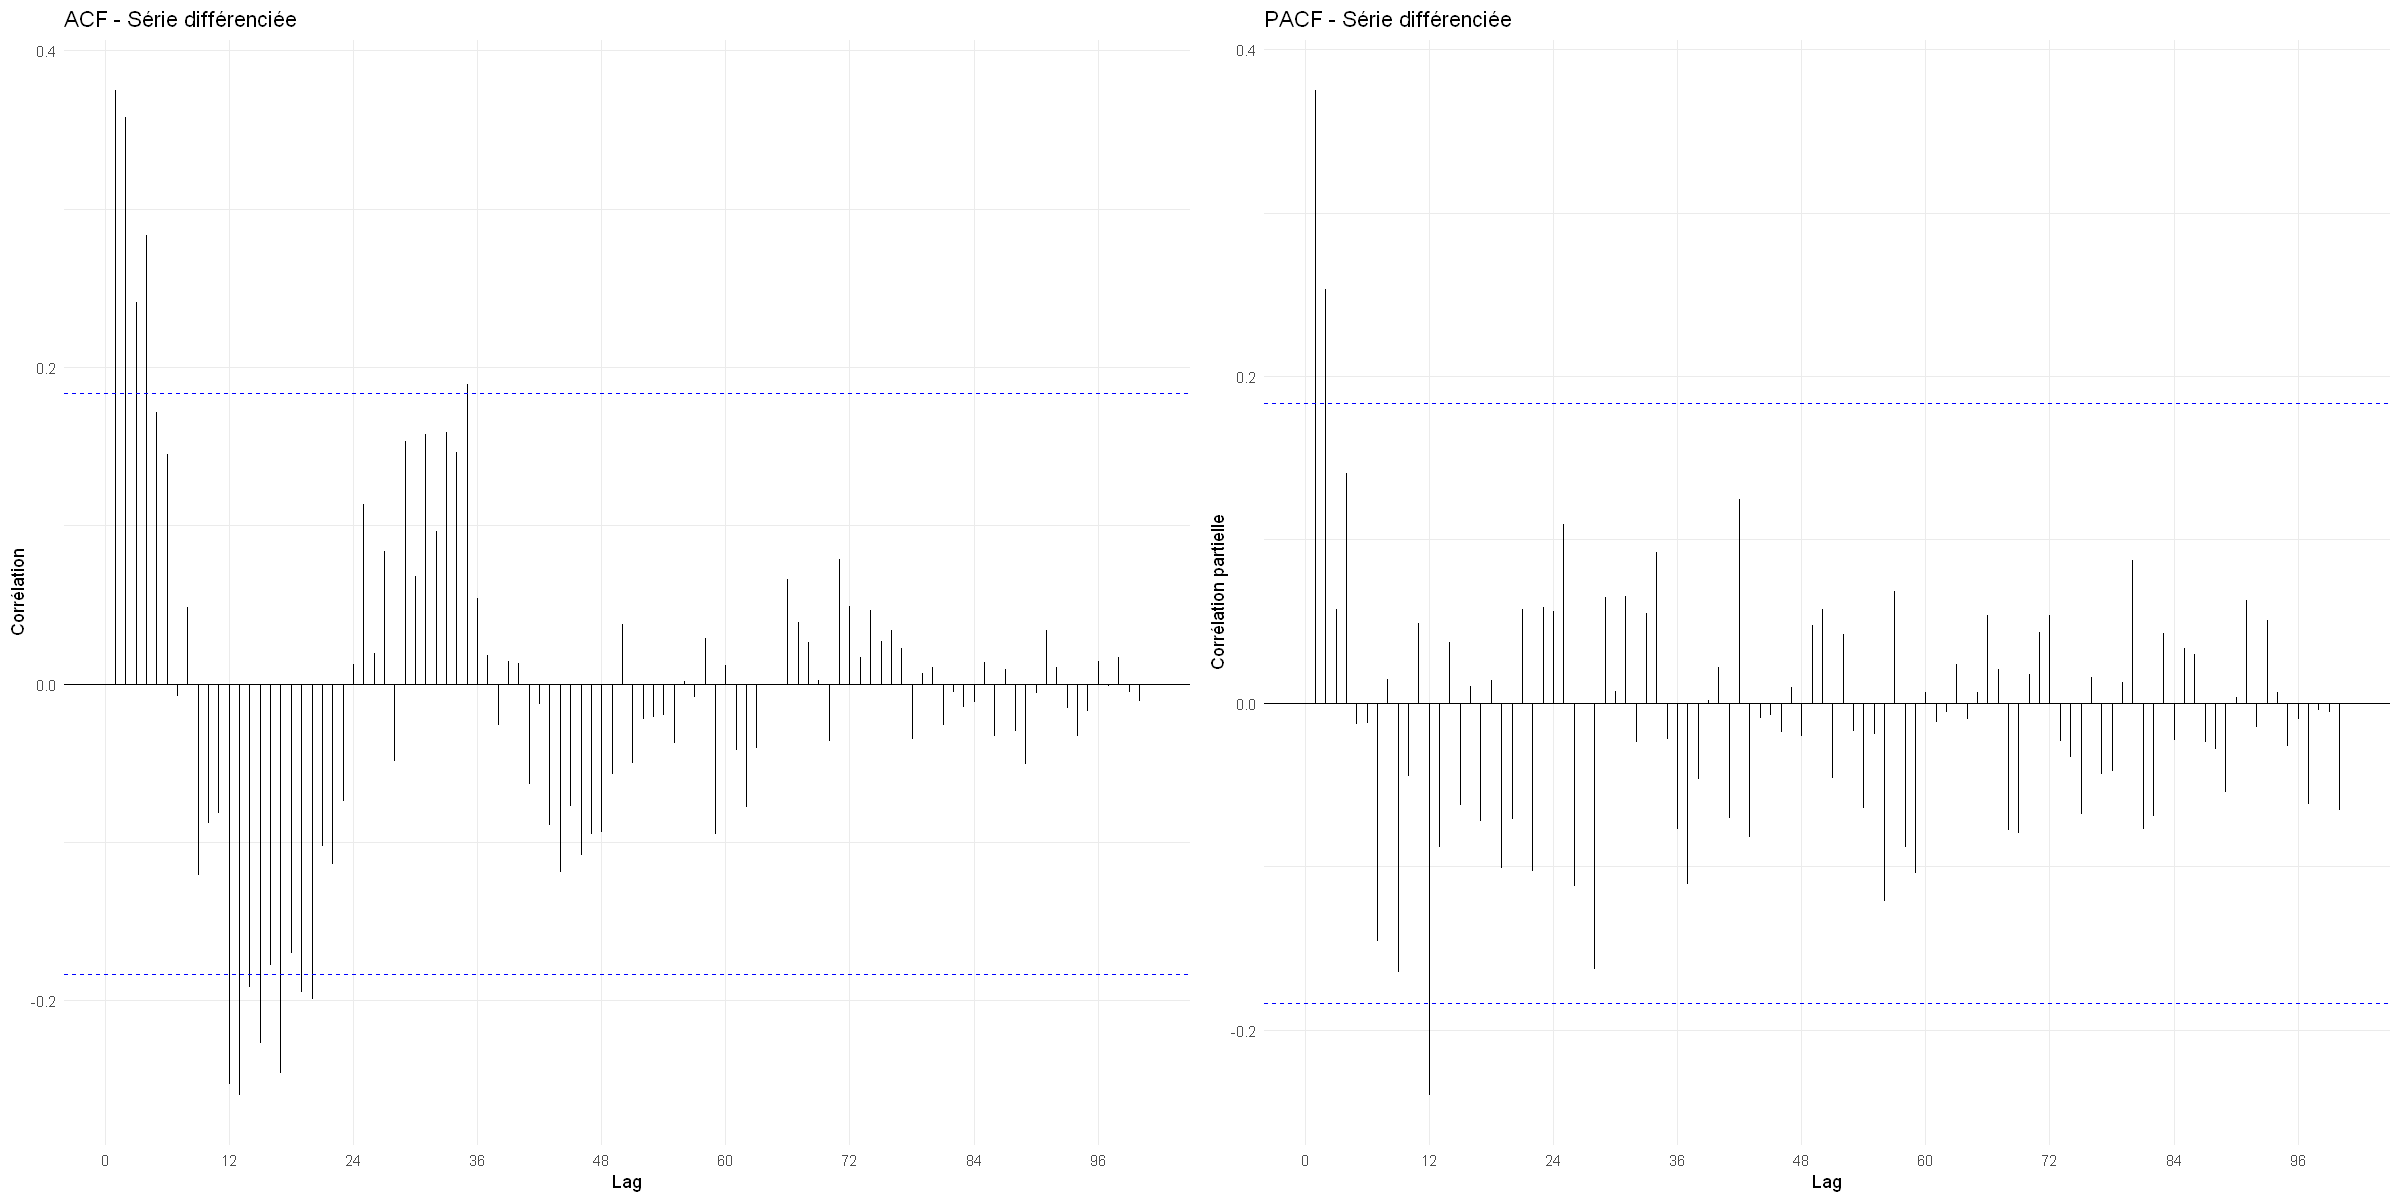

In [16]:
# Tracer l'ACF
acf_plot <- ggAcf(serie.df, lag.max = 100) +
  labs(title = "ACF - Série différenciée",
       x = "Lag",
       y = "Corrélation") +
  theme_minimal()

# Tracer le PACF
pacf_plot <- ggPacf(serie.df, lag.max = 100) +
  labs(title = "PACF - Série différenciée",
       x = "Lag",
       y = "Corrélation partielle") +
  theme_minimal()

# Afficher les graphiques
grid.arrange(acf_plot, pacf_plot, ncol=2)

Le constat est que les pics dans la série temporelle se répètent de manière annuelle, avec des pics initiaux de début de saison devenant progressivement moins élevés au fil du temps. Cette tendance périodique annuelle suggère fortement la présence de saisonnalité dans les données. La saisonnalité implique des variations systématiques et régulières qui se produisent à des intervalles réguliers de temps, dans ce cas, chaque année.

Ainsi, la structure de la série temporelle différenciée suggère qu'un modèle SARIMA (Seasonal Autoregressive Integrated Moving Average) serait plus approprié pour modéliser les données. Un modèle SARIMA est spécifiquement conçu pour capturer à la fois les tendances et la saisonnalité dans les données temporelles, ce qui en fait un choix adéquat pour ce type de série. En utilisant un modèle SARIMA, il serait possible de prendre en compte à la fois la saisonnalité annuelle observée ainsi que toute tendance ou variation à plus long terme présente dans les données. ***(s=12)***

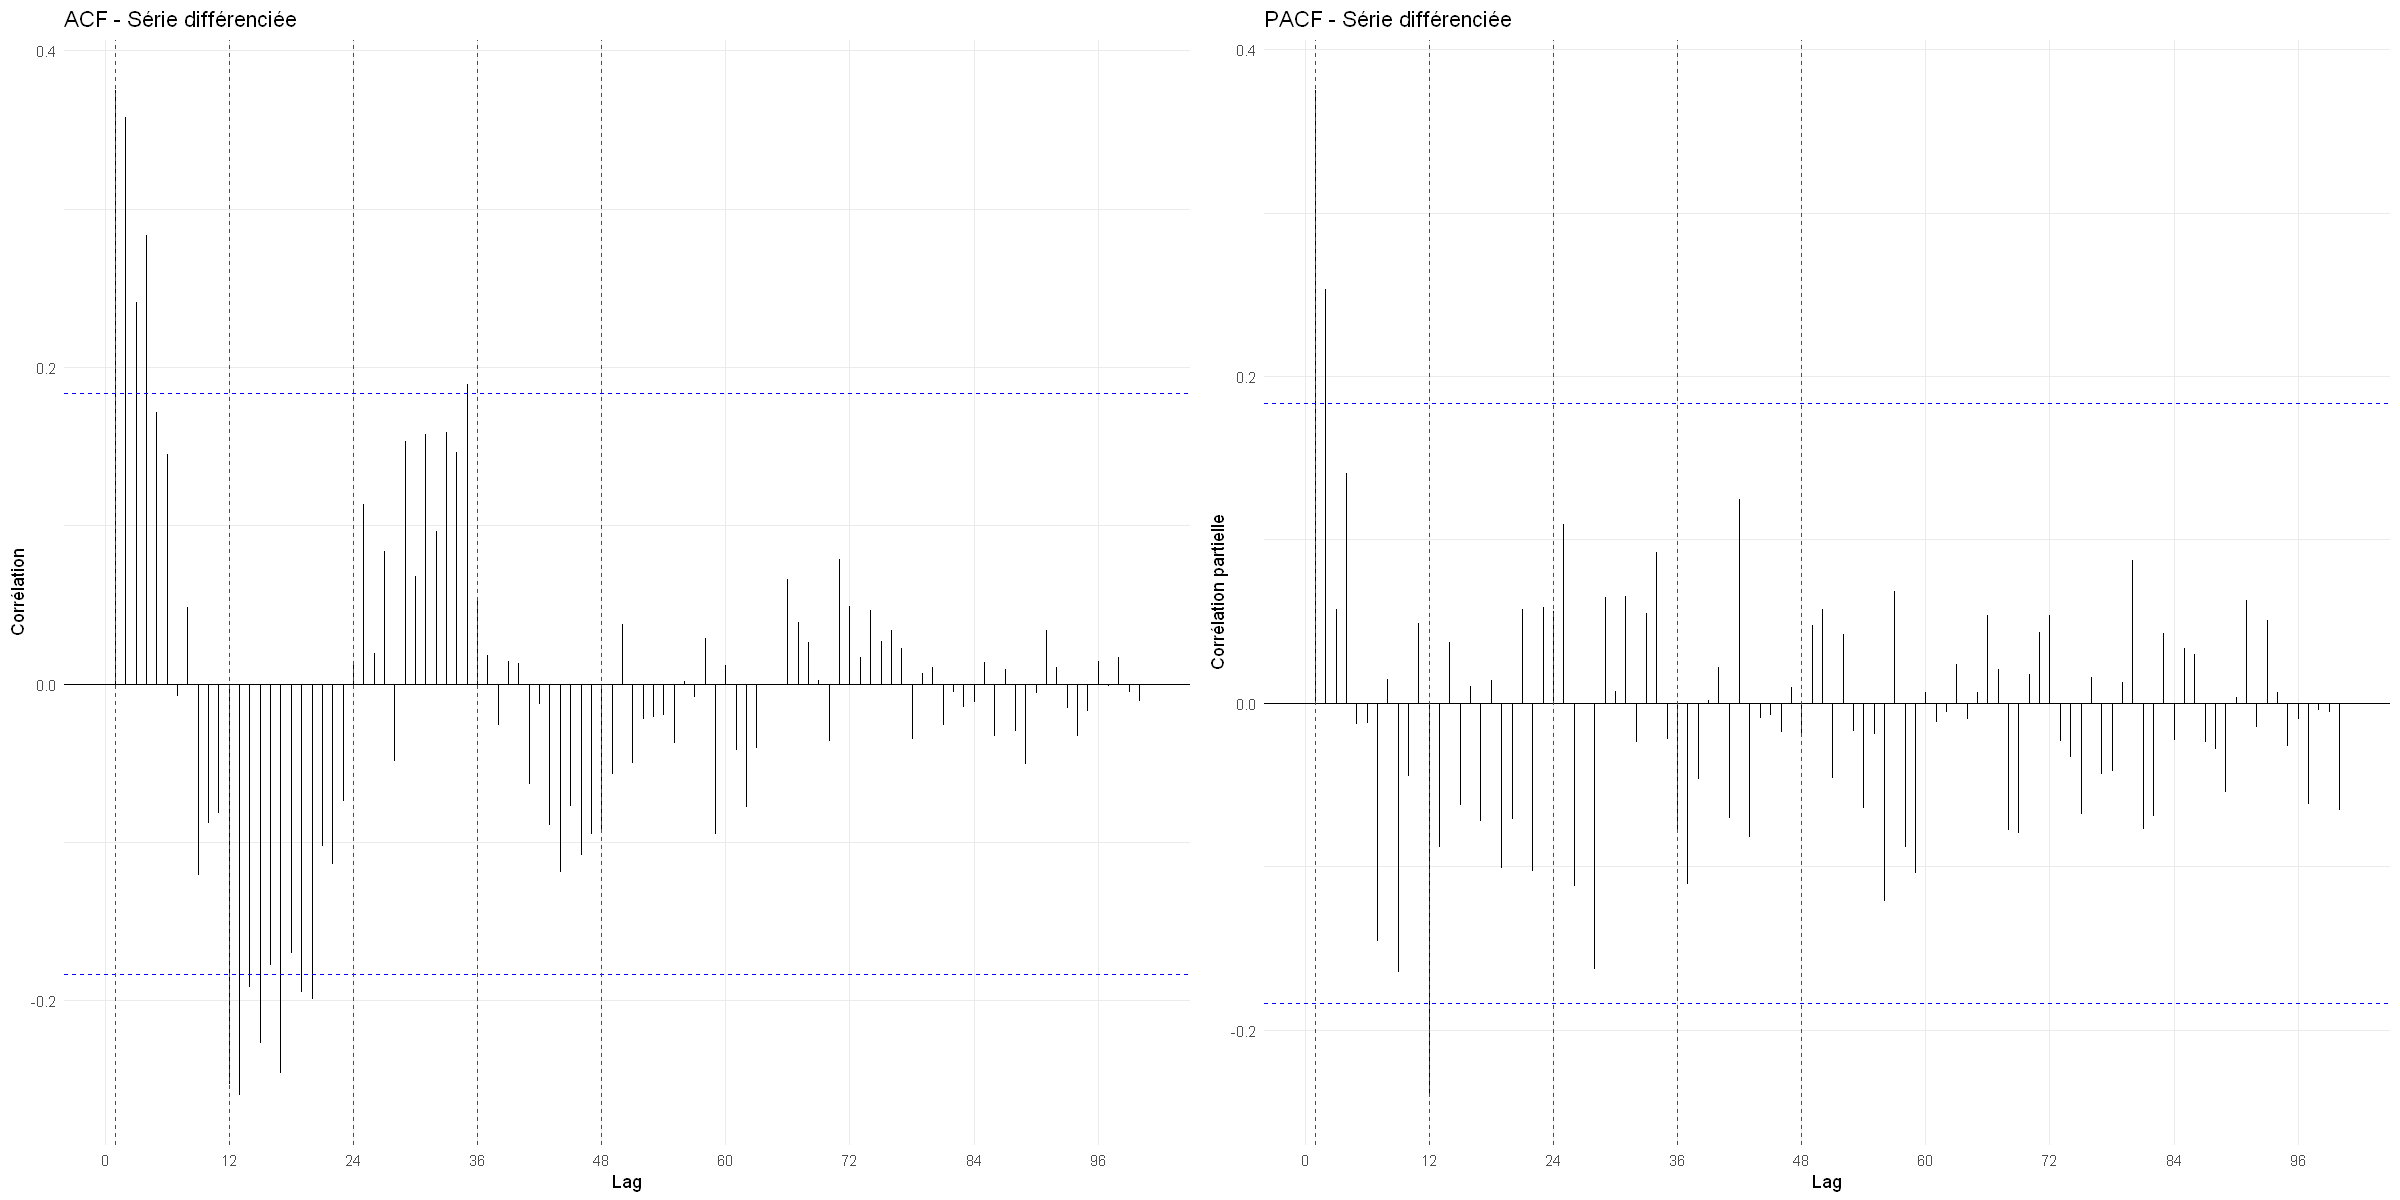

In [17]:
# Tracer l'ACF
acf_plot <- ggAcf(serie.df, lag.max = 100) +
  labs(title = "ACF - Série différenciée",
       x = "Lag",
       y = "Corrélation") +
  theme_minimal() +
    geom_vline(xintercept = c(1,12, 24, 36, 48), col = "red", linetype = "dashed")

# Tracer le PACF
pacf_plot <- ggPacf(serie.df, lag.max = 100) +
  labs(title = "PACF - Série différenciée",
       x = "Lag",
       y = "Corrélation partielle") +
  theme_minimal() +
    geom_vline(xintercept = c(1,12, 24, 36, 48), col = "red", linetype = "dashed")

# Afficher les graphiques
grid.arrange(acf_plot, pacf_plot, ncol=2)

Nous allons à présent déterminer les P, D, Q, p, q, d qui corresponderaient au meilleur modèle.

Nous avons observé que dans le PACF (Partial Autocorrelation Function), pour chaque pic de début de saison, il y a trois pics significatifs autour. Cela suggère que le modèle SARIMA pourrait bénéficier d'un ordre autoregressif (AR) maximal de 3 (**pmax = 3**). De plus, globalement, nous avons identifié deux pics de début de saison significatifs dans le PACF, indiquant que l'ordre saisonnier maximal (**Pmax**) devrait être de **2**.

En ce qui concerne l'ACF (Autocorrelation Function), nous n'avons observé aucun petit pic significatif autour du pic principal Q. Par conséquent, nous choisissons ***qmax = 0***. Cependant, en plus du tout premier pic, nous avons remarqué qu'un seul autre pic est significatif dans l'ACF. Par conséquent, nous choisirons également ***Qmax = 1*** pour inclure cet effet saisonnier supplémentaire dans notre modèle.

# Estimation du modèle

Dans le processus d'estimation du modèle, nous envisageons de construire une gamme de modèles potentiels en explorant différentes combinaisons d'ordres. Plus spécifiquement, nous considérerons les combinaisons d'ordres allant de 0 à un certain maximum pour les composantes AR et MA du modèle SARIMA, ce que nous notons par Pmax, Qmax, pmax et qmax. Pour chaque modèle, nous évaluerons les critères suivants :

1. **AIC (Critère d'Information d'Akaike)**

2. **Log-likelihood (Vraisemblance)** : La log-vraisemblance est une mesure de la probabilité des données observées sous l'hypothèse du modèle ajusté. Pour un modèle donné, elle quantifie à quel point ce modèle est capable de reproduire les données observées.

3. **Erreur de prédiction** : Nous évaluerons la performance de chaque modèle en termes d'erreur de prédiction, en utilisant l'erreur quadratique moyenne (MSE).

4. **Significativité avec la p-value du test de Box-Pierce** : Nous testerons la significativité des résidus du modèle en utilisant le test de Box-Pierce. L'hypothèse nulle de ce test est que les résidus ne présentent pas d'autocorrélation (ou d'autocorrélation jusqu'à un certain retard). Ainsi, une p-value faible suggère que l'autocorrélation est significative dans les résidus, ce qui indique que le modèle pourrait ne pas être adéquat.

### Split des données en train et test

In [18]:
length = round(nrow(resultat_mensuel)*0.8)

In [19]:
data_train = resultat_mensuel[(1:length),c("mois_annee","nombre_employes_total")]
data_test = resultat_mensuel[((length+1):nrow(resultat_mensuel)),c("mois_annee","nombre_employes_total")]

In [20]:
P.max = 2
Q.max = 1
p.max = 3
q.max = 0
d = 1
D = 1

In [21]:
Resultats <- data.frame(P=NA, Q=NA, p=NA, q=NA, aic=NA, log.lik = NA, p.valeur=NA, 
                        erreur.prediction = NA)
k = 1
print(paste0("Avec les différents ordres définis au préalable, nous pouvons définir ",((P.max+1)*(Q.max+1)*(p.max+1)*(q.max+1)), " modèles"))
for (P in 0:P.max){
  for (Q in 0:Q.max){
    for (p in 0:p.max){
      for (q in 0:q.max){
        #print(k)
        mod.aux <- arima(serie_mensuelle, order=c(p,1,q), 
                         seasonal= list(order = c(P,0,Q), period = 12), 
                         method = "CSS-ML")
        pred.aux <- predict(mod.aux, n.ahead=length(data_test$nombre_employes_total))
        erreur.aux <- sqrt(mean((exp(pred.aux$pred) - data_test$nombre_employes_total)^2))
        Resultats[k,] <- c(P,Q,p,q, mod.aux$aic, - mod.aux$loglik, 
                           Box.test(mod.aux$residuals)$p.value, erreur.aux)
        k <- k + 1
      }
    }
  }
}

[1] "Avec les différents ordres définis au préalable, nous pouvons définir 24 modèles"


Warning message in arima(serie_mensuelle, order = c(p, 1, q), seasonal = list(order = c(P, :
"problème de convergence possible : optim renvoie un code = 1"


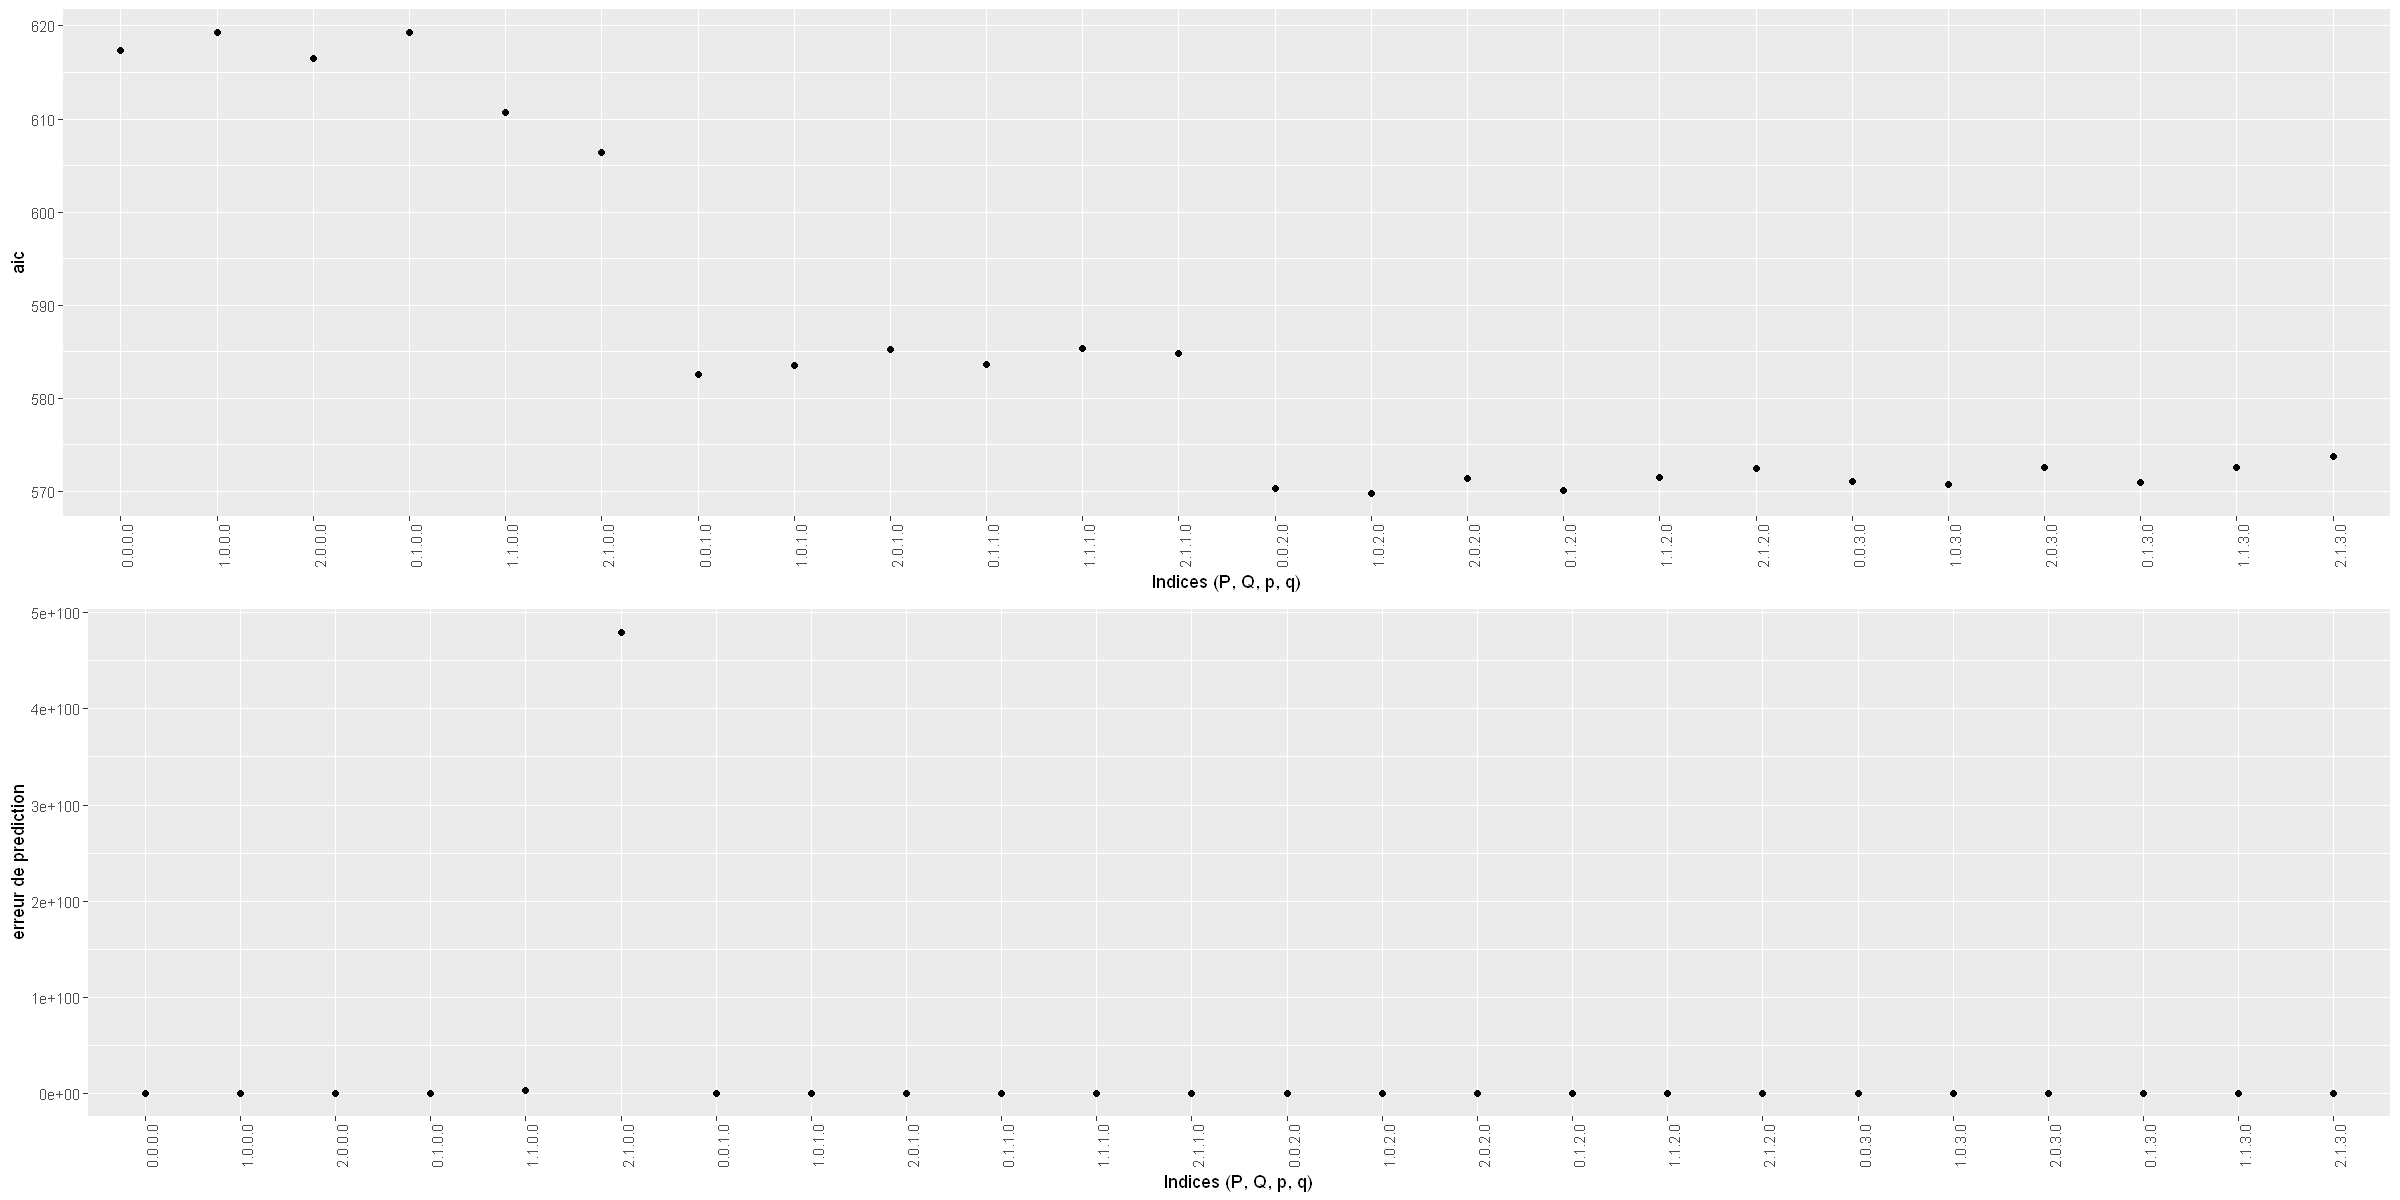

In [22]:
p1 <- ggplot(Resultats, aes(x = interaction(P, Q, p, q), y = aic)) +
  geom_point() +
  labs(x = "Indices (P, Q, p, q)", y = "aic") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

p2 <- ggplot(Resultats, aes(x = interaction(P, Q, p, q), y = erreur.prediction)) +
  geom_point() +
  labs(x = "Indices (P, Q, p, q)", y = "erreur de prediction") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

grid.arrange(p1, p2, ncol = 1)

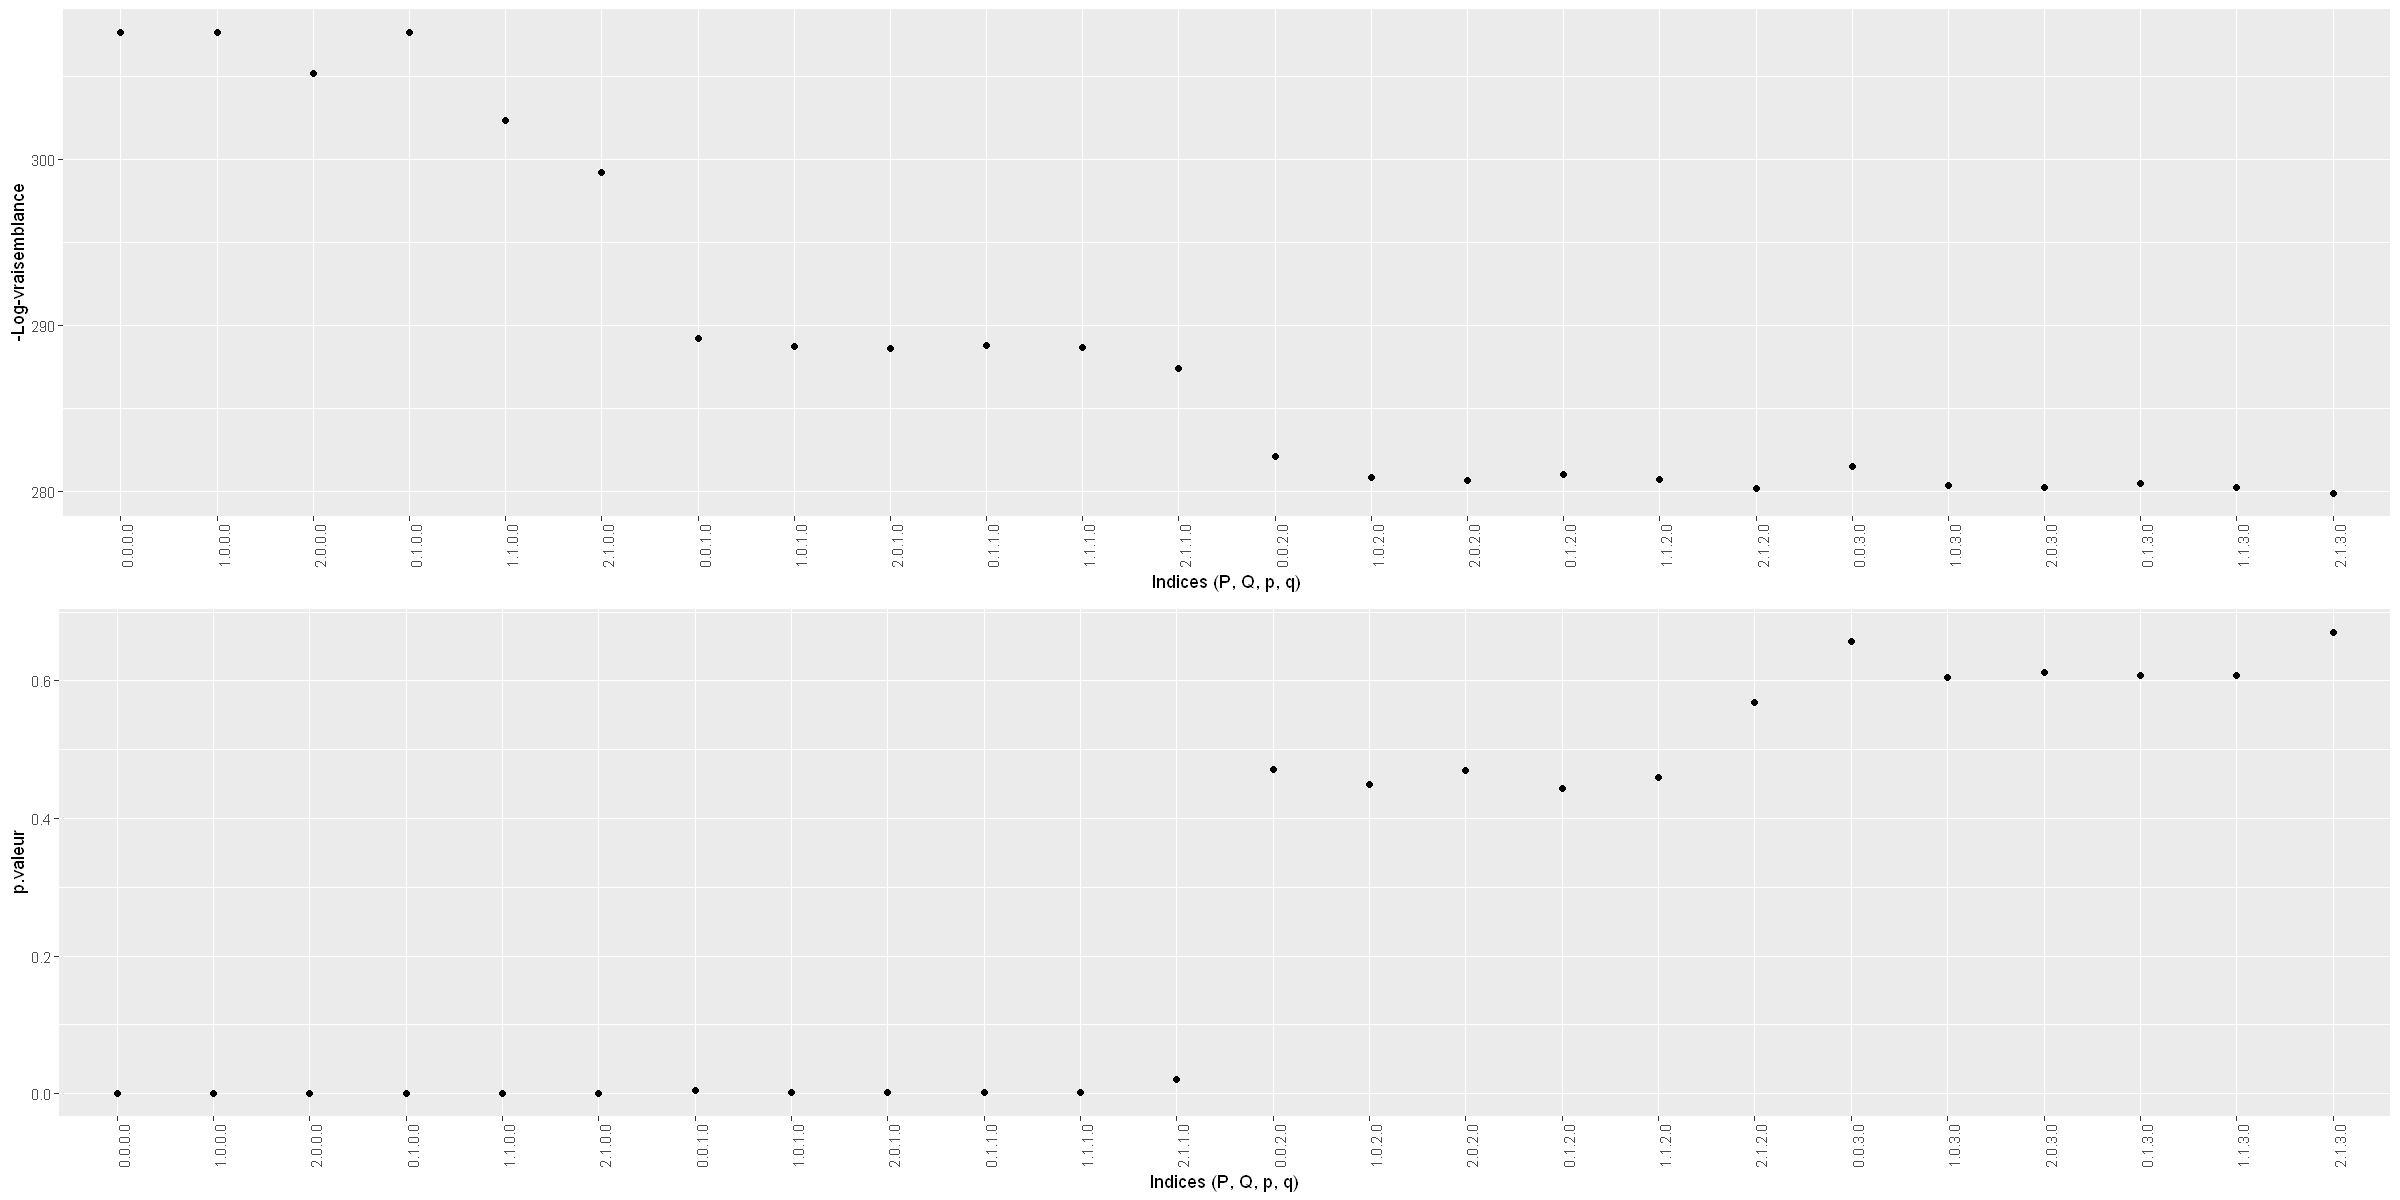

In [23]:
p3 <- ggplot(Resultats, aes(x = interaction(P, Q, p, q), y = log.lik)) +
  geom_point() +
  labs(x = "Indices (P, Q, p, q)", y = "-Log-vraisemblance") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

p4 <- ggplot(Resultats, aes(x = interaction(P, Q, p, q), y = p.valeur)) +
  geom_point() +
  labs(x = "Indices (P, Q, p, q)", y = "p.valeur") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

grid.arrange(p3, p4, ncol = 1)

### Meilleur modèle SARIMA:

In [24]:
ordre = Resultats[which(Resultats$aic == min(Resultats$aic)),1:4]
print(ordre)

   P Q p q
11 1 0 2 0


Notre meilleur modèle est donc **SARIMA(2,1,0)(1,0,0)[12]**:
Pour ce modèle, l'équation générale peut être exprimée comme suit :
$$
(1 - \phi_1 B - \phi_2 B^2) (1 - B^{12}) (Y_t - \mu) = (1 + \theta_1 B^{12}) \epsilon_t
$$ où 
- $Y_t$ est la série temporelle observée à l'instant $t$,
- $B$ est l'opérateur de retard (backshift operator) défini comme $BY_t = Y_{t-1}$,
- $\mu$ est la moyenne de la série temporelle,
- $\epsilon$ est le bruit blanc,
- $\phi_1$ et $\phi_2$ sont les coefficients autorégressifs,
- $\theta_1$ est le coefficient de la moyenne mobile saisonnière.

In [25]:
sarima_final = arima(data_train$nombre_employes_total, order=c(ordre$p,1,ordre$q), 
                         seasonal= list(order = c(ordre$P,0,ordre$Q), period = 12), 
                         method = "CSS-ML")
sarima_final


Call:
arima(x = data_train$nombre_employes_total, order = c(ordre$p, 1, ordre$q), 
    seasonal = list(order = c(ordre$P, 0, ordre$Q), period = 12), method = "CSS-ML")

Coefficients:
         ar1     ar2     sar1
      0.3521  0.3625  -0.0494
s.e.  0.0964  0.0976   0.1107

sigma^2 estimated as 8.225:  log likelihood = -225.33,  aic = 458.67

In [26]:
arima(data_train$nombre_employes_total, order=c(2,1,1), 
                         seasonal= list(order = c(0,0,0), period = 0), 
                         method = "CSS-ML")


Call:
arima(x = data_train$nombre_employes_total, order = c(2, 1, 1), seasonal = list(order = c(0, 
    0, 0), period = 0), method = "CSS-ML")

Coefficients:
         ar1     ar2      ma1
      0.7229  0.1531  -0.4393
s.e.  0.2022  0.1556   0.1873

sigma^2 estimated as 8.002:  log likelihood = -224.11,  aic = 456.22

In [27]:
arima(data_train$nombre_employes_total, order=c(2,1,1),method = "CSS-ML")


Call:
arima(x = data_train$nombre_employes_total, order = c(2, 1, 1), method = "CSS-ML")

Coefficients:
         ar1     ar2      ma1
      0.7229  0.1531  -0.4393
s.e.  0.2022  0.1556   0.1873

sigma^2 estimated as 8.002:  log likelihood = -224.11,  aic = 456.22

## Résidus du modèle

L'analyse des résidus est une étape cruciale dans la modélisation des séries temporelles. Une fois que nous avons ajusté un modèle à nos données, il est essentiel d'examiner attentivement les résidus pour évaluer la qualité de l'ajustement du modèle et pour vérifier si les hypothèses du modèle sont satisfaites. Les résidus sont les différences entre les valeurs observées et les valeurs prédites par le modèle, et leur exploration peut fournir des informations importantes sur la structure des données non capturée par le modèle.

Dans cette analyse, nous examinerons plusieurs aspects des résidus :

1. **Normalité** : Nous testerons si les résidus suivent une distribution normale. Une distribution normale des résidus est une hypothèse fondamentale de nombreux modèles statistiques, et son non-respect peut indiquer des problèmes avec le modèle.

2. **Stationnarité** : Nous vérifierons si les résidus sont stationnaires, c'est-à-dire s'ils ont une moyenne et une variance constantes à travers le temps. La stationnarité des résidus est importante pour garantir que les prédictions du modèle ne présentent pas de tendances ou de motifs systématiques incorrects.

3. **Autocorrélation** : Nous examinerons s'il existe une autocorrélation significative entre les résidus à différents retards temporels. Une autocorrélation positive peut indiquer que le modèle ne capture pas correctement certaines tendances ou structures temporelles présentes dans les données.

En résumé, l'analyse des résidus nous permettra d'évaluer la validité et la fiabilité de notre modèle SARIMA ajusté, ainsi que d'identifier d'éventuelles améliorations ou ajustements nécessaires pour une meilleure modélisation des données temporelles.

In [28]:
residus1.1 <- sarima_final$residuals

### Normalité des résidus

Pour étudier la normalité des résidus, nous construirons et interpréterons l'histogramme des résidus et le QQ-Plot avant d'effectuer un test de Shapiro Wilk.

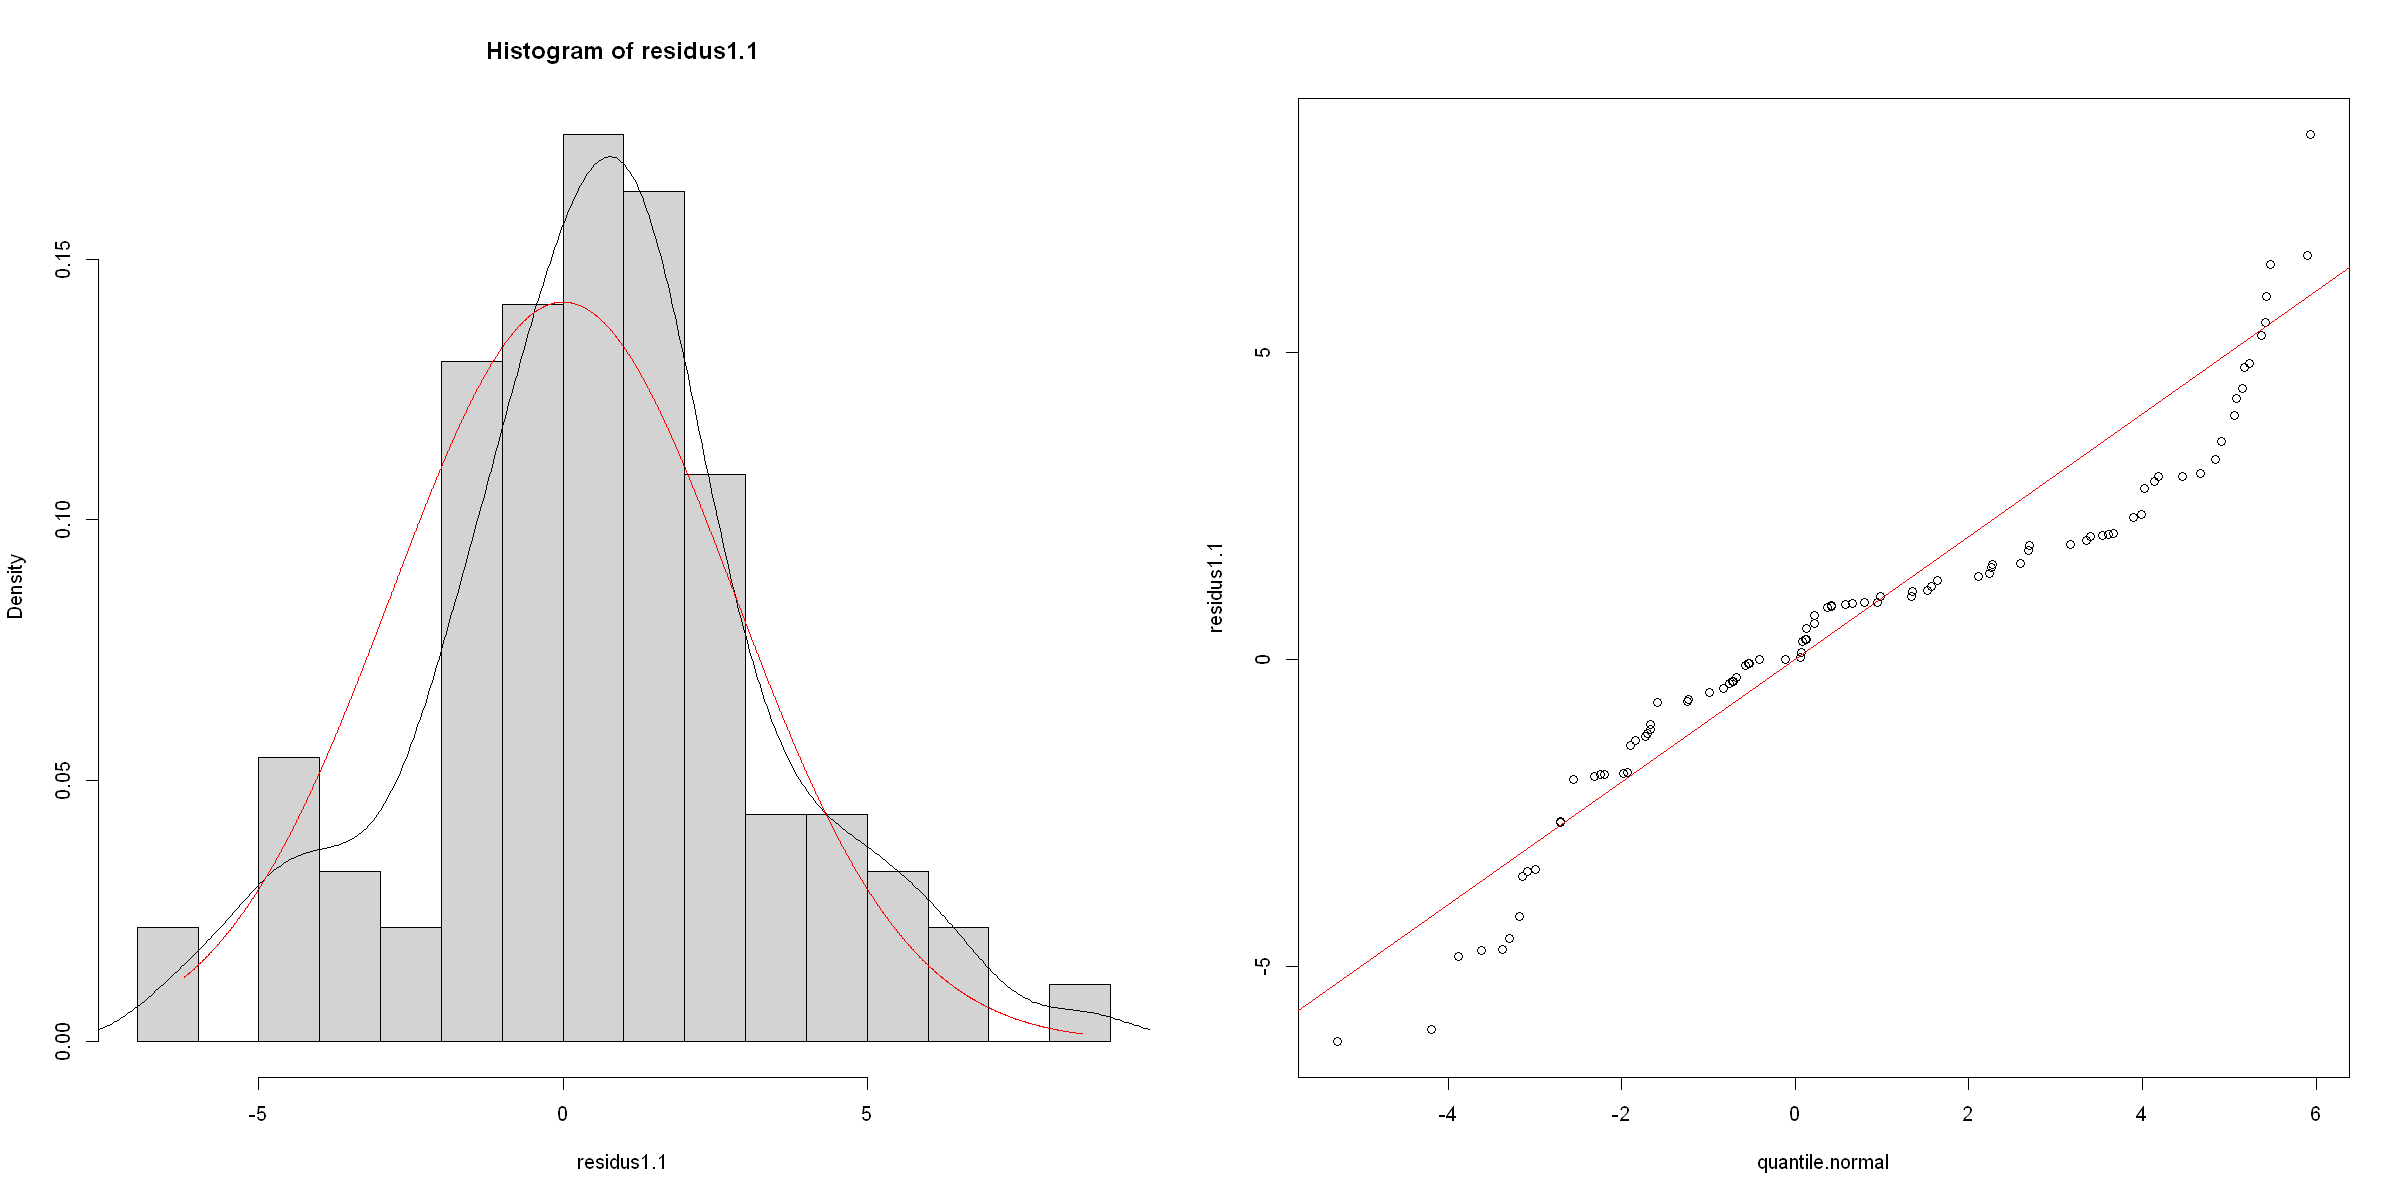

In [29]:
par(mfrow=c(1,2))
hist(residus1.1, probability = TRUE, breaks = 20)
lines(density(residus1.1, na.rm = TRUE))
t <- seq(min(residus1.1, na.rm = TRUE), max(residus1.1, na.rm = TRUE), by=0.01)
lines(t,dnorm(t, sd=sd(residus1.1, na.rm = TRUE)), col="red")

set.seed(912)
quantile.normal <- rnorm(length(residus1.1),sd=sd(residus1.1, na.rm = TRUE), mean = mean(residus1.1, na.rm = TRUE))
qqplot(quantile.normal, residus1.1)
abline(a=0, b=1, col="red")

A constater l'histogramme des résidus ainsi que le QQ-Plot, ils semblent montrer la normalité des erreurs. Cependant, nous effectuerons un test de Shapiro Wilk pour confirmer ou infirmer cette hypothèse de normalité des résidus.

In [30]:
# Test de normalité (test de Shapiro-Wilk)
shapiro_test <- shapiro.test(residus1.1)
cat("Test de Shapiro-Wilk pour la normalité des résidus:\n")
print(shapiro_test)

Test de Shapiro-Wilk pour la normalité des résidus:

	Shapiro-Wilk normality test

data:  residus1.1
W = 0.98566, p-value = 0.4133



Le test de Shapiro Wilk semble confirmer le constat fait sur l'histogramme et le QQ-Plot. Les résidus suivent une distribution normale.

### Stationnarité des résidus

Nous allons représenter l'évolution de la série autour de 0 et construire les ACF et pACF pour avoir un premier constat sur la stationnarité des résidus, puis nous vérifierons le constat par le test de Dickey-Fuller simple.


 Evolution de la série autour de la valeur 0, ACF et pACF. :


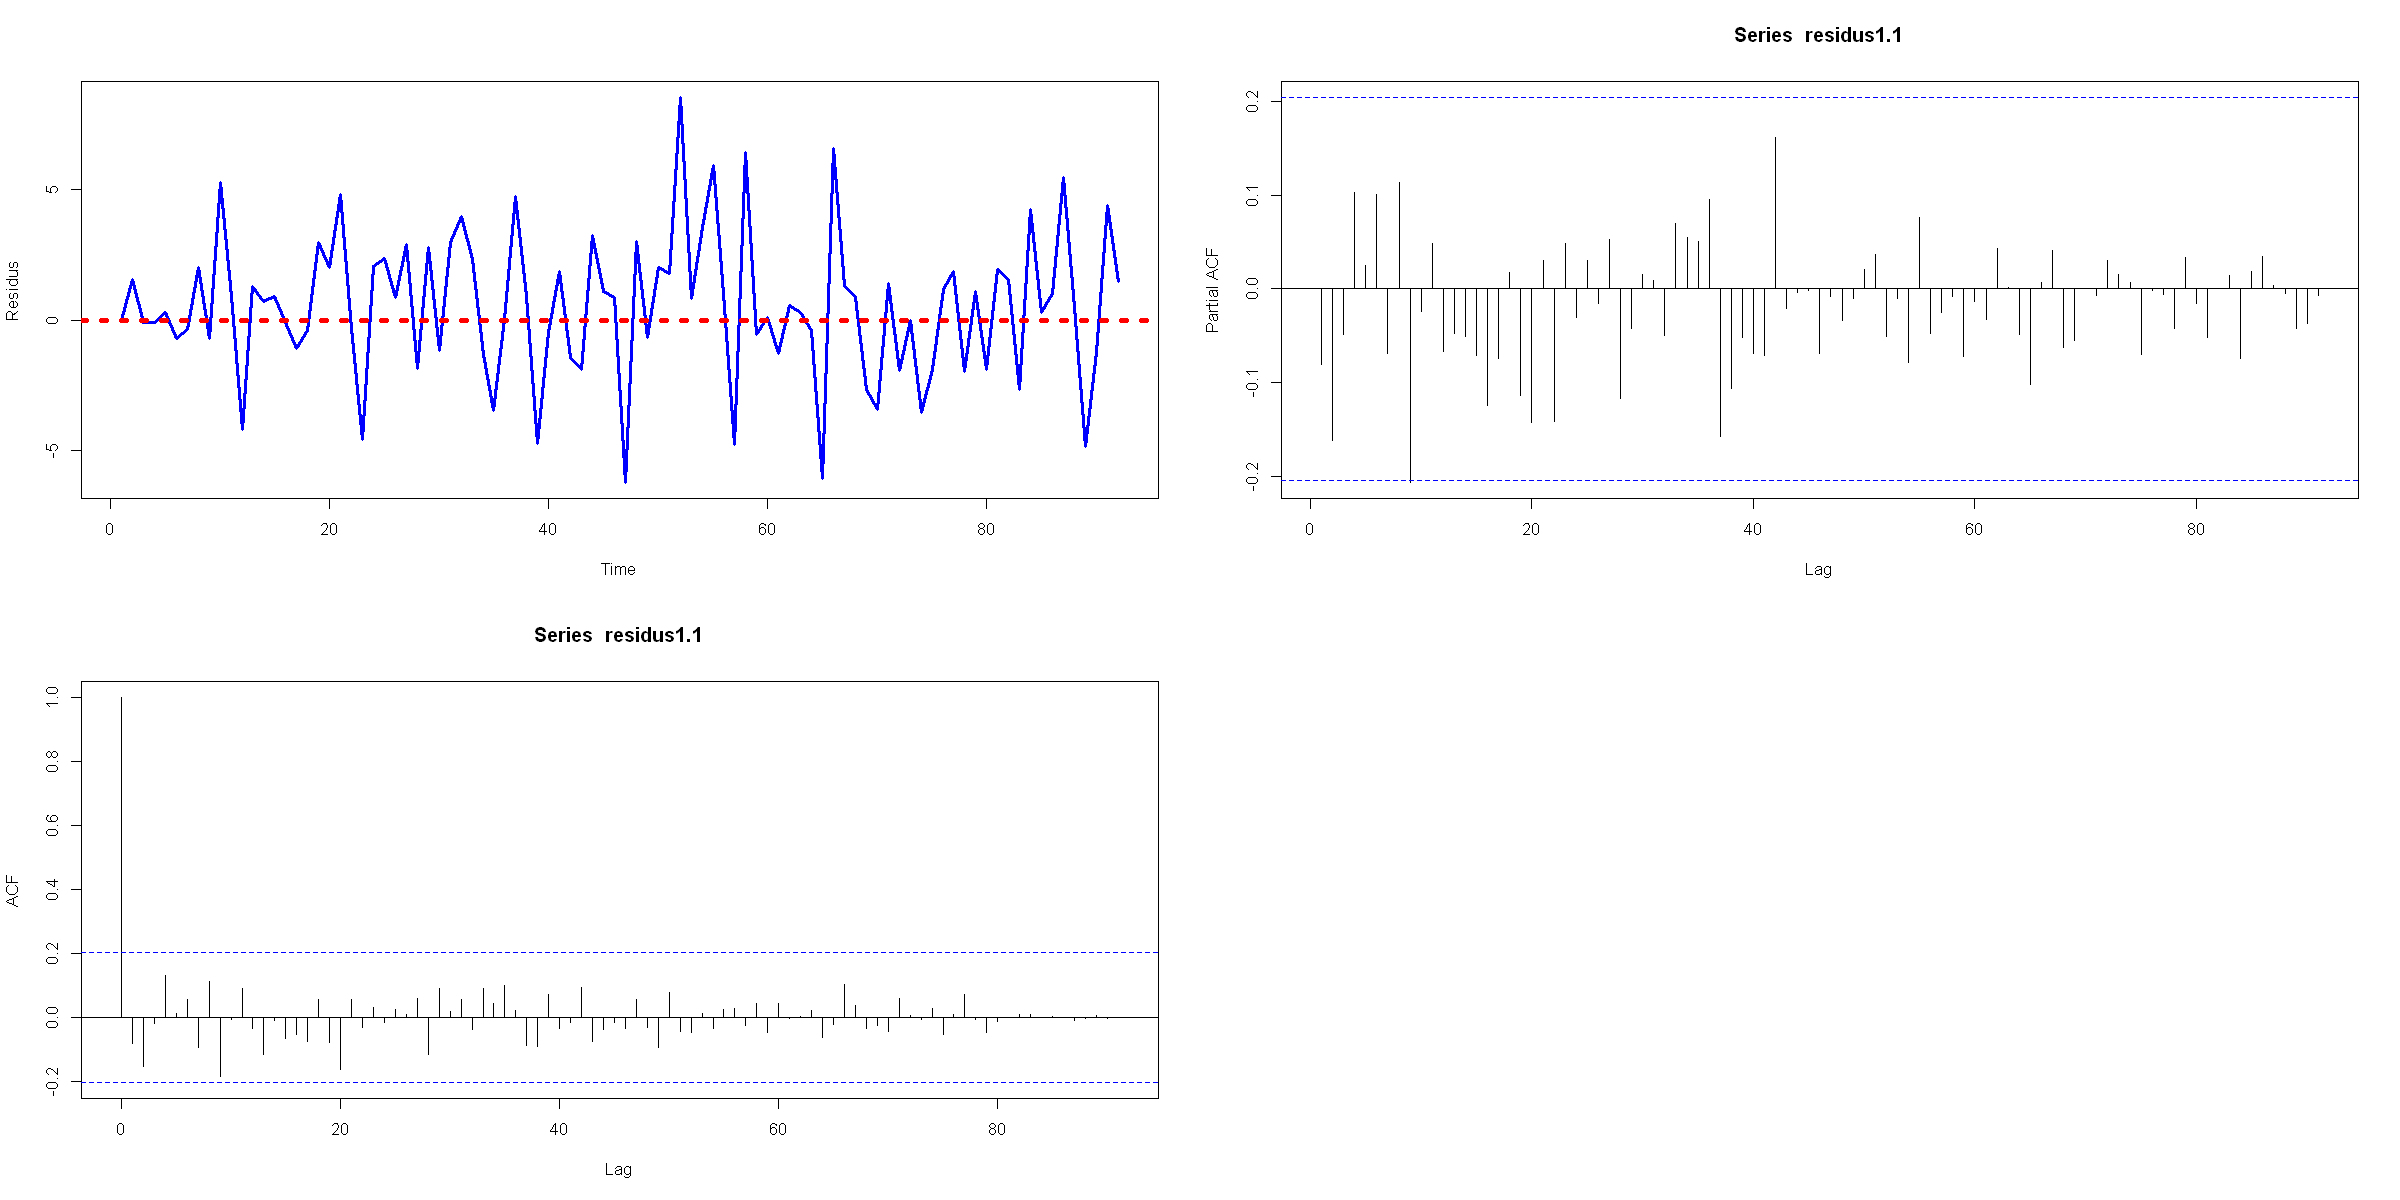

In [31]:
cat("\n Evolution de la série autour de la valeur 0, ACF et pACF. :\n")
par(mfrow=c(2,2))
plot(`residus1.1`,ylab="Residus",col="blue",lwd=3)
abline(h=0, col="red", lty=3, lwd=4)
pacf(residus1.1, na.action = na.pass, lag.max = 100)
acf(residus1.1, na.action = na.pass, lag.max = 100)


Les **ACF**, **pACF** et l'évolution de la série des résidus semblent montrés une stationnarité des résidus. pmax et qmax étant nuls, cela indique que les résidus sont essentiellement bruit blanc, c'est-à-dire qu'ils sont aléatoires et non corrélés. Néanmoins, nous allons vérifier cete hypothèse par un test de stationnarité.

In [32]:
# Test de stationnarité (test de Dickey-Fuller)
adf_test <- adf.test(residus1.1)
cat("\nTest de Dickey-Fuller pour la stationnarité des résidus:\n")
print(adf_test)


Test de Dickey-Fuller pour la stationnarité des résidus:

	Augmented Dickey-Fuller Test

data:  residus1.1
Dickey-Fuller = -3.9379, Lag order = 4, p-value = 0.01577
alternative hypothesis: stationary



Le test de Dickey Fuller simple d'hypothèse alternative la stationnarité des résidus a pour valeur de la statistique de test **-3.9379** avec une p-value de **0.01577** inférieure au seuil de **5%**. Cela confirme la stationnarité constatée sur les graphiques d'en haut.

### Autocorrélation des résidus

Pour étudier l'autocorrélation des résidus, nous effectuerons le test de **Ljung-Box**. Ce dernier a pour hypothèse nulle **Hypothèse nulle (H0)** : Il n'y a pas d'autocorrélation dans les résidus jusqu'au nombre de retards spécifié.
Si la p-value du test est supérieure à un niveau de signification choisi (par exemple, 0.05), alors nous ne pouvons pas rejeter l'hypothèse nulle et conclure qu'il n'y a pas d'autocorrélation significative dans les résidus jusqu'au retard spécifié.

In [33]:
# Test d'autocorrélation (test de Ljung-Box)
ljung_box_test <- Box.test(residus1.1, lag = 20, type = "Ljung-Box") 

# Le paramètre lag dans le test de Ljung-Box spécifie le nombre de retards à inclure dans le test d'autocorrélation.
#En d'autres termes, il détermine jusqu'à quel point nous voulons vérifier l'autocorrélation des résidus.

cat("\nTest de Ljung-Box pour l'autocorrélation des résidus:\n")
print(ljung_box_test)


Test de Ljung-Box pour l'autocorrélation des résidus:

	Box-Ljung test

data:  residus1.1
X-squared = 18.888, df = 20, p-value = 0.5291



Puisque la valeur p (p-value) est supérieure à un seuil de signification communément choisi (par exemple, 0.05), nous ne pouvons pas rejeter l'hypothèse nulle. Cela suggère qu'il n'y a pas suffisamment de preuves pour conclure que les résidus présentent une autocorrélation significative jusqu'au 20ème retard. En d'autres termes, les résidus semblent être indépendants jusqu'à ce retard spécifié.

### Prédictions

In [51]:
predictions = forecast(sarima_final, h = nrow(data_test))

In [61]:
# Créer un data frame avec les prédictions
predictions_df <- data.frame(ds = data_test$mois_annee, y = data_test$nombre_employes_total, yhat = as.numeric(predictions$mean))

In [62]:
length(predictions)

[1] 10

In [63]:
predictions_df %>% tail(10)

ds         y   yhat    
14 2023-03-01 191 173.2067
15 2023-04-01 191 173.2365
16 2023-05-01 194 173.2748
17 2023-06-01 197 173.2999
18 2023-07-01 198 173.3256
19 2023-08-01 201 173.3573
20 2023-09-01 206 173.3789
21 2023-10-01 208 173.3859
22 2023-11-01 203 173.3935
23 2023-12-01 200 173.4094

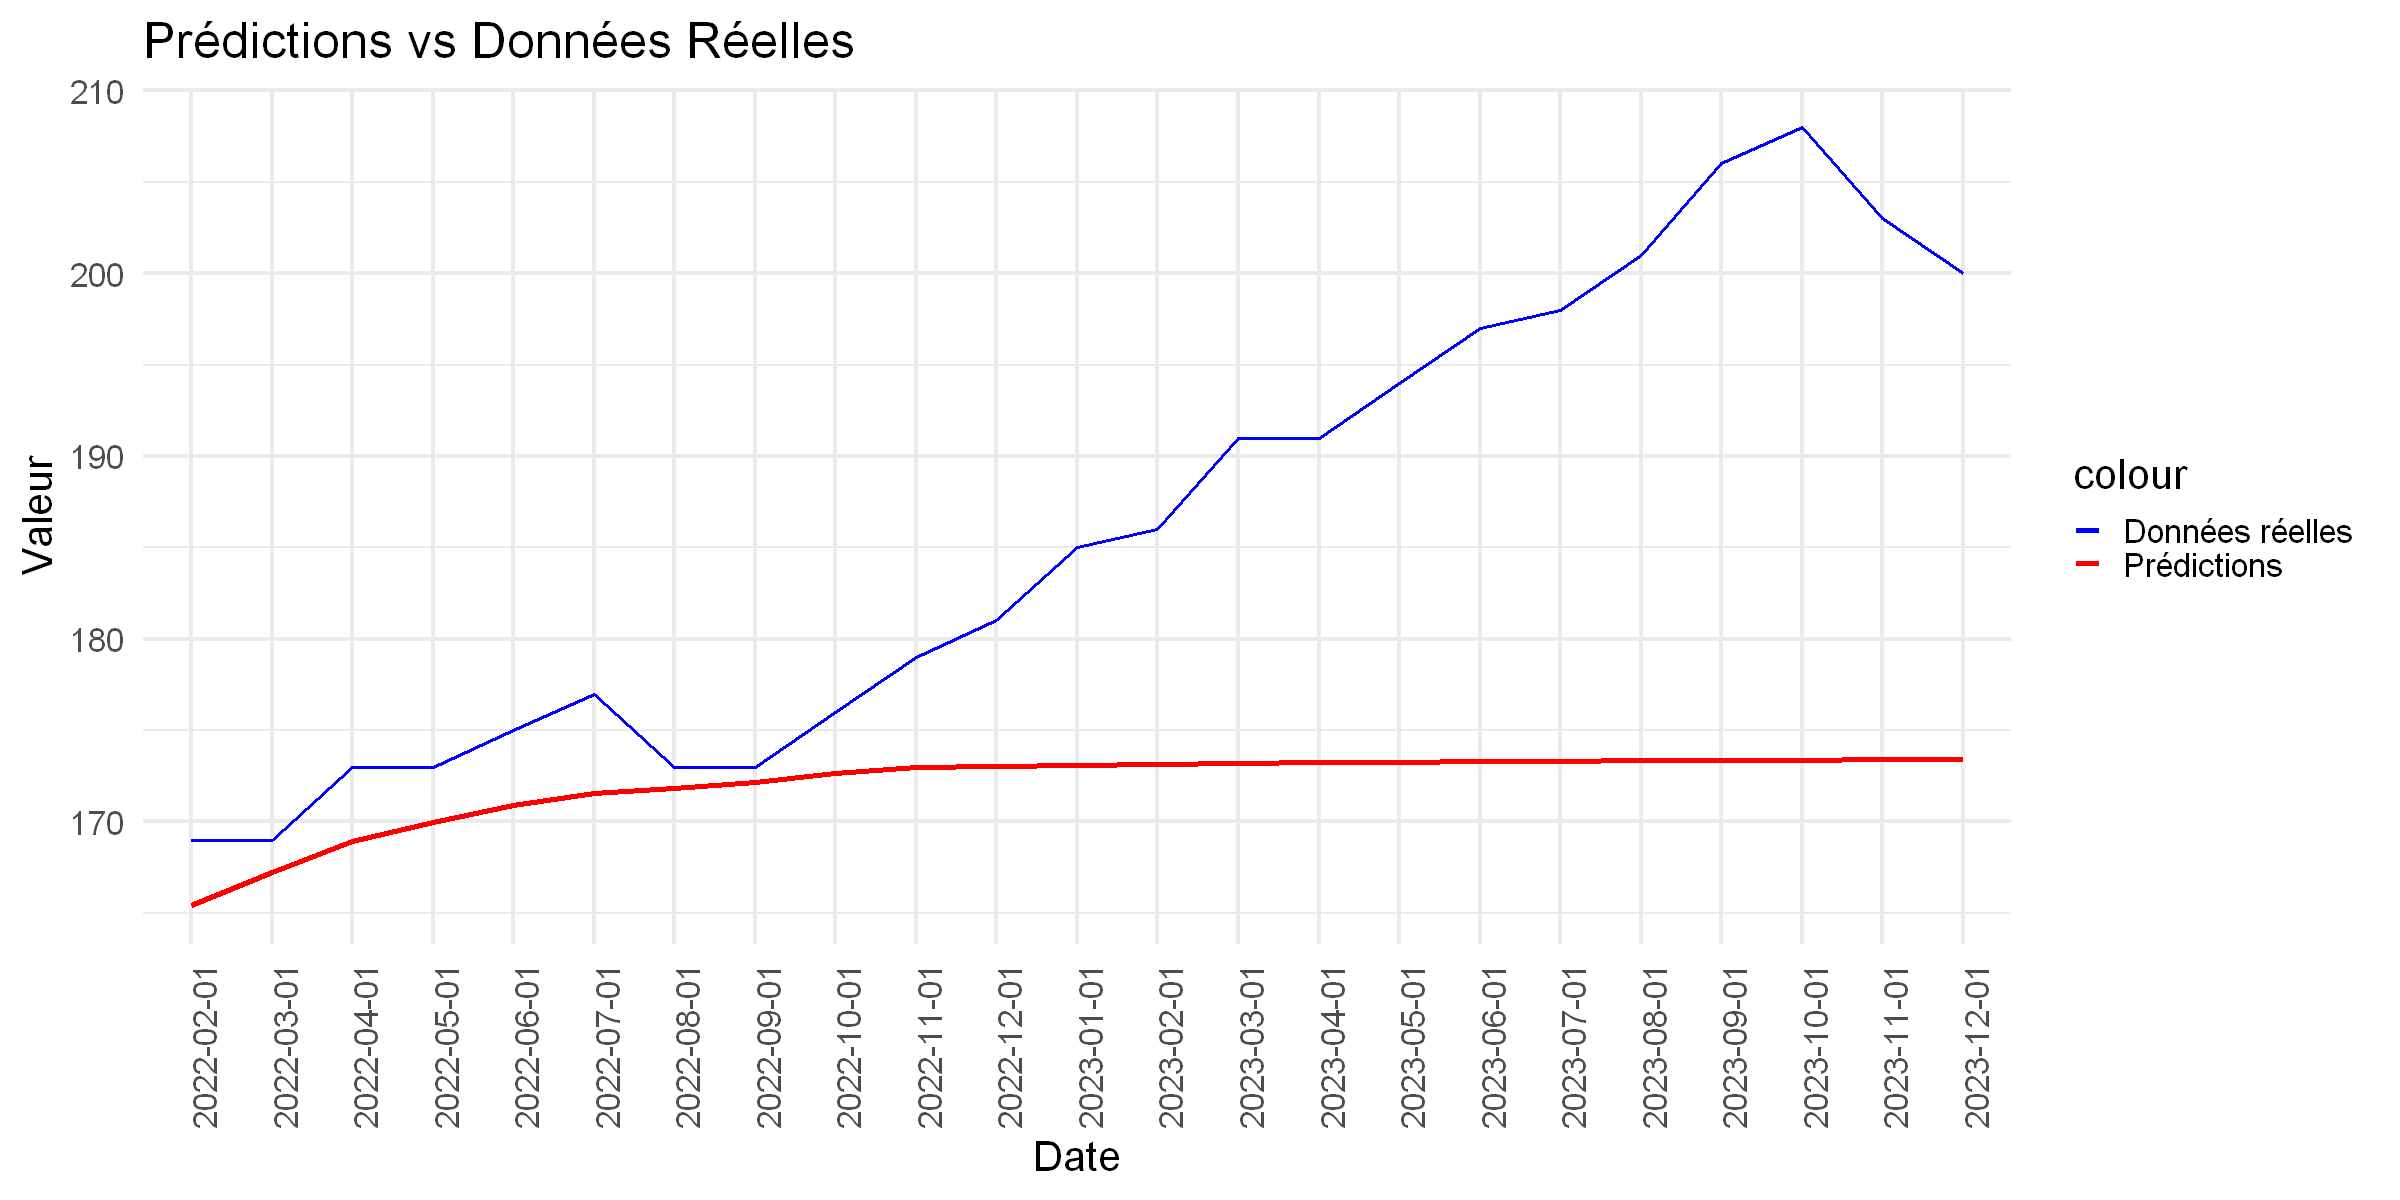

In [68]:
# Plot des prédictions avec ggplot2
plot_pred <- ggplot(predictions_df, aes(x = ds)) +
  geom_line(aes(y = y, color = "Données réelles", group = 1), size = 1) +
  geom_line(aes(y = yhat, color = "Prédictions", group = 2), size = 1.5) +
  labs(title = "Prédictions vs Données Réelles",
       x = "Date",
       y = "Valeur") +
  scale_color_manual(values = c("Données réelles" = "blue", "Prédictions" = "red")) +
  theme_minimal(base_size = 25) +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

print(plot_pred)

### Calcul de l'erreur de prédiction

Pour le calcul de l'erreur de prédiction, nous utiliserons le Mean Absolute Percentage error qui calcule le pourcentage moyen d'erreur entre les valeurs réelles et les valeurs prédites. Elle mesure l'écart relatif moyen entre les valeurs réelles et les prévisions, exprimé en pourcentage.

In [69]:
mean_absolute_percentage_error <- function(y_true, y_pred) {
  y_true <- as.numeric(y_true)
  y_pred <- as.numeric(y_pred)
  mean(abs((y_true - y_pred) / y_true)) * 100
}

In [70]:
mape = mean_absolute_percentage_error(predictions_df$y,predictions_df$yhat)
rmse = sqrt(mean((predictions_df$y - predictions_df$yhat)^2))

In [71]:
print(mape)
print(rmse)

[1] 7.164053
[1] 17.87668
